In [31]:
# This is a Python 3 script

In [1]:
# first to run everytime
%matplotlib inline
import os

if 'bettyjo' in os.path.expanduser('~'):
    archive_dir = '/home/bettyjo/yaolun/CDF_archive_v2/'
    plotdir = '/home/bettyjo/yaolun/test/cops-spire/'
    dist_file = '/home/bettyjo/yaolun/cops-spire_distance.txt'
else:
    archive_dir = '/Volumes/SD-Mac/CDF_archive_v2/'
    plotdir = '/Users/yaolun/test/cops-spire/'
    dist_file = '/Users/yaolun/data/cops-spire_distance.txt'

# Source Information

In [2]:
from astropy.io import ascii

dist = ascii.read(dist_file)

# source list
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [18.9, 70.4, 23.2, 3.3, 0.327,
                     5.26, 0.889, 13.5, 6.06, 23.5,
                     0.545, 2.47, 4.41, 3.91, 2.0,
                     2.62, 0.79, 1.49, 2.34, 19.7,
                     5.36, 2.23, 4.6, 8.78, 0.565,
                     35.1]
t_bol_list = [52.8, 62.6, 111.0, 66.8, 63.4,
                     40.1, 53.6, 51.1, 48.2, 110.0,
                     128.0, 79.9, 55.9, 354.0, 125.0,
                     159.0, 149.0, 43.2, 349.0, 129.0, 
                     33.2, 210.0, 115.0, 49.3, 45.5,
                     592.0]
alpha500_list = [2.76, 2.82, 2.42, 2.13, 1.82,
                 2.28, 2.32, 2.58, 2.46, 2.72,
                 1.57, 1.74, 2.08, 2.05, 2.37,
                 2.27, 1.99, 2.45, 2.44, 2.65,
                 2.65, 2.39, 2.56, 2.52, 2.30,
                 2.06]
alpha500_err_list = [0.04, 0.05, 0.03, 0.02, 0.01,
                     0.02, 0.02, 0.01, 0.02, 0.007,
                     0.02, 0.03, 0.01, 0.02, 0.02,
                     0.01, 0.01, 0.01, 0.01, 0.05,
                     0.02, 0.02, 0.03, 0.01, 0.01,
                     0.03]
alpha_nir_list = [2.68, -999, 0.71, 1.50, 0.75,
                  0.79, 1.99, 1.95, 2.45, 1.43,
                  0.99, 1.71, 2.91, 0.14, 1.02,
                  -0.15, 0.55, 1.32, -999, 1.13,
                  -999, 2.49, 0.40, 2.05, 0.74,
                  -0.63]
alpha_nir_err_list = [1.19, -999, 0.03, 0.32, 0.24,
                      0.37, 0.54, 0.33, 0.75, 0.17,
                      0.23, 0.39, 1.45, 0.08, 0.33,
                      0.84, 0.04, 0.15, -999, 0.19,
                      -999, 0.48, 0.30, 1.12, 0.18,
                      0.24]

The difference on L_bol and T_bol with/without including the lines in the SEDs

In [4]:
# source list (same as the one in above)
import numpy as np
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [19.0, 70.3, 23.3, 3.3, 0.327, 
              5.43, 0.889, 13.5, 6.13, 23.5,
              0.521, 2.33, 4.4, 3.81, 1.96,
              2.62, 0.792, 1.49, 2.34, 19.7,
              5.36, 2.29, 4.61, 8.78, 0.564,
              34.7]
t_bol_list = [52.8, 62.6, 111.0, 66.7, 63.5,
              40.9, 53.6, 51.1, 48.4, 109.0,
              129.0, 80.5, 55.8, 361.0, 126.0,
              158.0, 149.0, 43.2, 349.0, 129.0,
              33.1, 207.0, 115.0, 49.3, 45.4,
              597.0]

l_bol_list_noline = [18.9, 70.4, 23.2, 3.3, 0.327,
                     5.26, 0.889, 13.5, 6.06, 23.5,
                     0.545, 2.47, 4.41, 3.91, 2.0,
                     2.62, 0.79, 1.49, 2.34, 19.7,
                     5.36, 2.23, 4.6, 8.78, 0.565,
                     35.1]
t_bol_list_noline = [52.8, 62.6, 111.0, 66.8, 63.4,
                     40.1, 53.6, 51.1, 48.2, 110.0,
                     128.0, 79.9, 55.9, 354.0, 125.0,
                     159.0, 149.0, 43.2, 349.0, 129.0, 
                     33.2, 210.0, 115.0, 49.3, 45.5,
                     592.0]
l_bol_list = np.array(l_bol_list)
t_bol_list = np.array(t_bol_list)
l_bol_list_noline = np.array(l_bol_list_noline)
t_bol_list_noline = np.array(t_bol_list_noline)

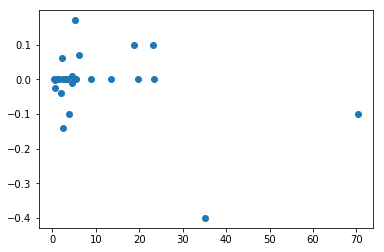

In [136]:
plt.plot(l_bol_list_noline, l_bol_list-l_bol_list_noline, 'o', linestyle='None')

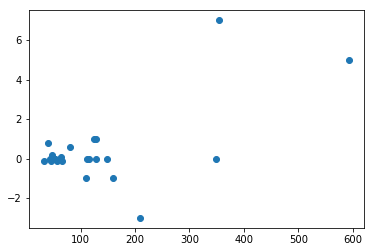

In [137]:
plt.plot(t_bol_list_noline, t_bol_list-t_bol_list_noline, 'o', linestyle='None')

In [140]:
print(np.mean((l_bol_list-l_bol_list_noline)/l_bol_list_noline), (l_bol_list-l_bol_list_noline).max(), (l_bol_list-l_bol_list_noline).min())
print(np.mean((t_bol_list-t_bol_list_noline)/t_bol_list_noline), (t_bol_list-t_bol_list_noline).max(), (t_bol_list-t_bol_list_noline).min())

-0.00300242203172 0.17 -0.4
0.00150218987037 7.0 -3.0


## The agreement between spectra and photometry

/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/astropy/io/ascii/core.py:716: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  self.data_lines = data_lines[slice(start_line, end_line)]


RCrA-IRS7B 250 0.0850771982912
RCrA-IRS7C 250 0.00203376022509
L723-MM 250 -0.128411942804
L1014 250 -0.0785527365267
L1157 250 -0.135346452595
Ced110 250 -0.0920300625788
BHR71 250 -0.156859519117
IRAS03245 250 -0.133719638764
L1551-IRS5 250 -0.0633048328764
L1455-IRS3 250 -0.02623528739
B1-a 250 -0.0423402675095
B1-c 250 -0.0630988018374
IRAS03301 250 0.0859729798328
TMR1 250 -0.0879986058718
TMC1A 250 -0.0741984853642
TMC1 250 -0.177506057852
IRAS15398 250 0.0476342470036
RNO91 250 -0.0812867218332
GSS30-IRS1 250 -0.0247749987762
VLA1623 250 -0.100939308289
WL12 250 0.0454182298244
RCrA-IRS5A 250 0.0322921032534
L483 250 -0.0781606928356
B335 250 -0.141169621083
DKCha 250 -0.171912912033
RCrA-IRS7B 350 0.148529882568
RCrA-IRS7C 350 0.0945297776966
L723-MM 350 -0.00868532036457
L1014 350 0.0365947065353
L1157 350 -0.00847639156115
Ced110 350 0.0396373169181
BHR71 350 -0.0267837416915
IRAS03245 350 -0.0258352444893
L1551-IRS5 350 0.00295356484908
L1455-IRS3 350 0.0743095113202
B1-a 35

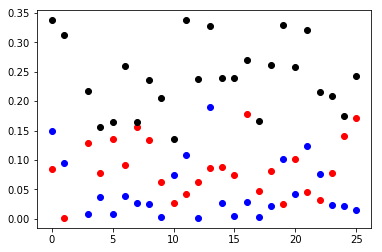

In [6]:
from Spectrophotometry import Spectrophotometry
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import numpy as np


phot_wl = [250, 350, 500]
colors = ['r', 'b', 'k']
for wl in phot_wl:
    for o in obj_list:
        if not os.path.exists(archive_dir+o+'/spire/data/'+o+'_spire_phot.txt'): continue
        spec = ascii.read(archive_dir+o+'/spire/data/'+o+'_spire_corrected.txt')
        phot = ascii.read(archive_dir+o+'/spire/data/'+o+'_spire_phot.txt', data_start=4)
   
        sphot = Spectrophotometry(spec, wl)
        print(o, wl, 1-np.mean(sphot[0]/phot['flux(Jy)'][phot['wavelength(um)'] == wl]))
        plt.plot(obj_list.index(o), abs(1-np.mean(sphot[0]/phot['flux(Jy)'][phot['wavelength(um)'] == wl])), 'o',
                 color=colors[phot_wl.index(wl)])

# Evolutionary Indicators - Submillimeter Luminosity

In [5]:
def lsubmm(low_wave, spec, dist):
    """
    spec = 'Wavelength(um)' and 'Flux_Density(Jy)'
    dist: distance in parsec
    """
    import sys
    sys.path.append('/Users/yaolun/programs/misc/hyperion/')
#     sys.path.append('/home/bettyjo/yaolun/programs/misc/hyperion/')
    from l_bol import l_bol
    
    l = l_bol(spec['Wavelength(um)'][spec['Wavelength(um)'] >= low_wave],
              spec['Flux_Density(Jy)'][spec['Wavelength(um)'] >= low_wave], dist)
    return l.data[0]

RCrA-IRS7B 0.144910054604 18.9 52.8 130.425732373
RCrA-IRS7C 0.144533692567 70.4 62.6 487.083660215
HH46 0.184806910657 23.2 111.0 125.536431065
L723-MM 0.0647899429208 3.3 66.8 50.9338309502
L1014 0.0241334971386 0.327 63.4 13.5496317886
L1157 0.105311928942 5.26 40.1 49.9468583743
Ced110 0.0204171511297 0.889 53.6 43.5418239476
BHR71 0.160209593251 13.5 51.1 84.2646169061
IRAS03245 0.0505106191747 6.06 48.2 119.974771622
L1551-IRS5 0.0774421734084 23.5 110.0 303.4522272
L1455-IRS3 0.0457044500803 0.545 128.0 11.924440597
B1-a 0.0907179123597 2.47 79.9 27.2272579444
B1-c 0.114437227428 4.41 55.9 38.5364107389
IRAS03301 0.0476874070966 3.91 354.0 81.9922960391
TMR1 0.0146777173322 2.0 125.0 136.260969927
TMC1A 0.0152252076488 2.62 159.0 172.083038894
TMC1 0.0152333753738 0.79 149.0 51.8598131152
IRAS15398 0.0320380419759 1.49 43.2 46.5072116805
RNO91 0.0151525509008 2.34 349.0 154.429443287
GSS30-IRS1 0.0676801804016 19.7 129.0 291.074874256
VLA1623 0.148989684612 5.36 33.2 35.97564498

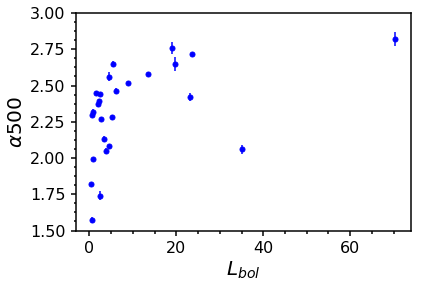

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

lsubmm_list = []
for o in obj_list:
    spec = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_continuum.txt')
    l = lsubmm(350, spec, dist['distance'][dist['object'] == o])
    lsubmm_list.append(l)
    print(o, l, l_bol_list[obj_list.index(o)], t_bol_list[obj_list.index(o)], l_bol_list[obj_list.index(o)]/l)

    ax.errorbar(l_bol_list[obj_list.index(o)], alpha500_list[obj_list.index(o)],
                yerr=alpha500_err_list[obj_list.index(o)], marker='o', color='b', markersize=5)

# ax.set_xlim([0,400])
ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$L_{bol}}$', fontsize=20)
ax.set_ylabel(r'$\alpha 500$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'alpha500_lbol.pdf', format='pdf', dpi=300, bbox_inches='tight')
# fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/alpha500_lbol.pdf', format='pdf', dpi=300, bbox_inches='tight')
# fig.savefig('/Volumes/SD-Mac/Dropbox/cops-spire/figures/alpha500_lbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

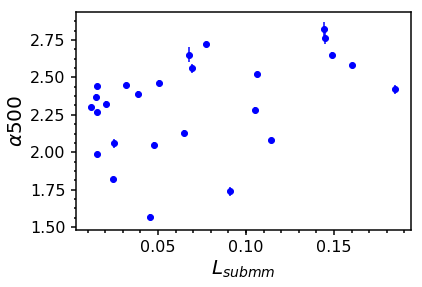

In [11]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
   
ax.errorbar(lsubmm_list,
            np.array(alpha500_list),
            yerr=alpha500_err_list, marker='o', color='b', linestyle='None')

# ax.set_xlim([0,400])
# ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$L_{submm}}$', fontsize=20)
ax.set_ylabel(r'$\alpha 500$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

# fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/alpha500_lsmm.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Plot against BHR71 modeling results

In [8]:
from AlphaHyperion import AlphaHyperion
# aperture_list, alpha, alpha_err, lbol, lsmm
import numpy as np
from astropy.io import ascii

model_dir = '/home/bettyjo/yaolun/hyperion/bhr71/controlled/'
# age grid
model_range = np.arange(141,175)
aperfile = '/home/bettyjo/yaolun/bhr71/best_calibrated/aperture.txt'
model_list = ascii.read(model_dir+'model_list.txt')
dstar = 200.0
wave_center = 500.0

collection = {'age':[],'results':[]}

for i in model_range:
    result = AlphaHyperion(model_dir+'model'+str(i)+'/model'+str(i)+'.rtout',
                           aperfile, dstar, wave_center, lbollsmm=True)
    collection['results'].append(result)
    
    # get age from model list
    collection['age'].append(model_list['age'][model_list['Model#'] == 'Model'+str(i)].data)

/home/bettyjo/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(array([ 4000.]), 0.20312420168063)
(array([ 6000.]), 0.19938874095675177)
(array([ 8000.]), 0.19655240027301007)
(array([ 10000.]), 0.19362966338236914)
(array([ 12000.]), 0.18962806021115858)
(array([ 14000.]), 0.1888806170817523)
(array([ 16000.]), 0.18632607773547538)
(array([ 18000.]), 0.18155459601865953)
(array([ 20000.]), 0.17921531240964625)
(array([ 22000.]), 0.1770024427083198)
(array([ 24000.]), 0.17480910381247677)
(array([ 26000.]), 0.17054678568434739)
(array([ 28000.]), 0.16924829553584489)
(array([ 30000.]), 0.16542299802669386)
(array([ 32000.]), 0.1646927685167747)
(array([ 34000.]), 0.16180379876031115)
(array([ 36000.]), 0.15988106842017621)
(array([ 38000.]), 0.15615040805281905)
(array([ 40000.]), 0.15451078725832496)
(array([ 42000.]), 0.15233885297263908)
(array([ 44000.]), 0.14912523037971154)
(array([ 46000.]), 0.14667894223847597)
(array([ 48000.]), 0.14330918157925931)
(array([ 50000.]), 0.14263506154914787)
(array([ 55000.]), 0.13530489914624932)
(array([ 

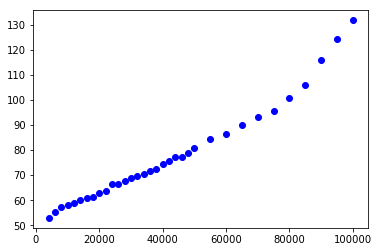

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.plot(collection['age'][i], collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
           'o', color='b')
    print(collection['age'][i],collection['results'][i][4][aper_ind])

(52.949216955650343, 2.9774002911504325)
(55.282837500055699, 2.9792001031454927)
(57.249256968324914, 2.978175063634751)
(58.140497891197597, 2.9763246173219198)
(58.987600670034105, 2.9735976627079159)
(59.95358621847938, 2.9707859626366231)
(60.994834820406503, 2.9694433579032551)
(61.301406150866178, 2.9638277014940857)
(63.058333407326337, 2.9668148756181449)
(63.72980184768155, 2.9635449356718859)
(66.293571601525073, 2.9646393366656953)
(66.586962575963724, 2.9646584649146295)
(67.523030429256124, 2.9629565599891099)
(68.799712844488411, 2.9636546691829331)
(69.753679413195215, 2.962963858879414)
(70.383390329541569, 2.9623870378450157)
(71.692916986861306, 2.9626077125235653)
(72.494578785834463, 2.9612905982571194)
(74.252105120594152, 2.9656681021953473)
(75.647369696989259, 2.9645387604440727)
(77.116724624317726, 2.9653093075789188)
(77.349221187055377, 2.9622500170602075)
(78.714962810840987, 2.9630800780549209)
(80.827465637081644, 2.9668270624834649)
(84.202618059707305,

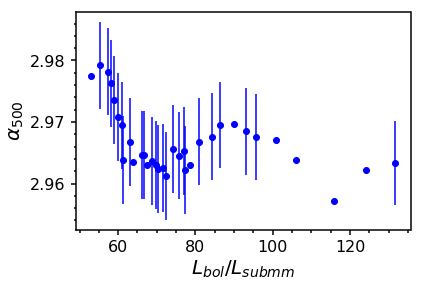

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.errorbar(collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
                collection['results'][i][1][aper_ind], yerr=collection['results'][i][2][aper_ind],
                marker='o', color='b')
    print(collection['results'][i][3][aper_ind]/collection['results'][i][4][aper_ind],
          collection['results'][i][1][aper_ind])
# ax.plot(np.array(l_bol_list)/np.array(lsubmm_list), np.array(alpha500_list),'o')

ax.set_xlabel(r'$L_{bol}/L_{submm}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{500}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

In [22]:
# tstar grid
model_range = np.arange(85,88)
aperfile = '/home/bettyjo/yaolun/bhr71/best_calibrated/aperture.txt'
model_list = ascii.read(model_dir+'model_list.txt')
dstar = 200.0
wave_center = 500.0

collection = {'tstar':[],'results':[]}

for i in model_range:
    result = AlphaHyperion(model_dir+'model'+str(i)+'/model'+str(i)+'.rtout',
                           aperfile, dstar, wave_center, lbollsmm=True)
    collection['results'].append(result)
    
    # get age from model list
    collection['tstar'].append(model_list['tstar'][model_list['Model#'] == 'Model'+str(i)].data)

(array([ 6450.]), 2.980001240131668)
(array([ 6950.]), 2.9722652985659304)
(array([ 7450.]), 2.9704176733355507)


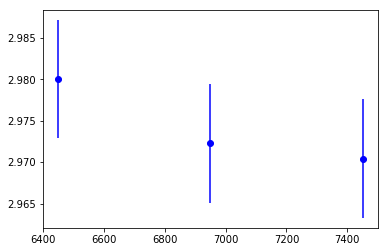

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

aper_ind = 3

for i in range(len(collection['results'])):
    ax.errorbar(collection['tstar'][i], collection['results'][i][1][aper_ind],
                yerr=collection['results'][i][2][aper_ind],
                marker='o', color='b', linestyle='None')
    print(collection['tstar'][i],collection['results'][i][1][aper_ind])

## Exercise on RJ-limit

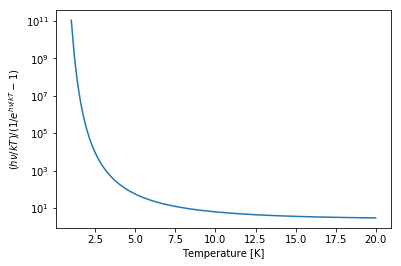

In [33]:
import astropy.constants as const
import numpy as np
import matplotlib.pyplot as plt
h = const.h.cgs.value
k = const.k_B.cgs.value
c = const.c.cgs.value

# T-range
T = np.linspace(1, 20, num=100)
nu = c/(500e-4)

plt.plot(T,k*T/h/nu/(1/np.exp(h*nu/k/T)))
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel(r'$(h\nu/kT) / (1/e^{h\nu /kT}-1)$')

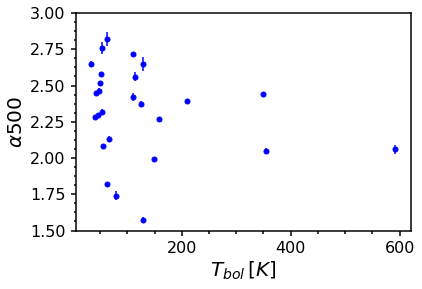

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(t_bol_list, alpha500_list, yerr=alpha500_err_list, marker='o', linestyle='None', color='b', markersize=5)
ax.set_ylim([1.5, 3.0])

ax.set_xlabel(r'$T_{bol}\,[K]$', fontsize=20)
ax.set_ylabel(r'$\alpha 500$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'alpha500_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

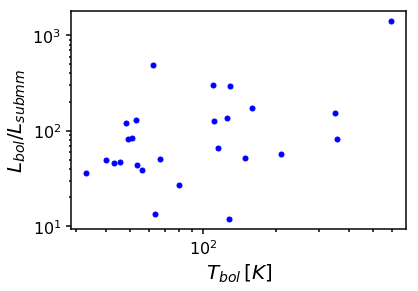

In [164]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_bol_list, np.array(l_bol_list)/np.array(lsubmm_list), marker='o', linestyle='None', color='b', markersize=5)

ax.set_xlabel(r'$T_{bol}\,[K]$', fontsize=20)
ax.set_ylabel(r'$L_{bol}/L_{submm}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

ax.set_xscale('log')
ax.set_yscale('log')

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'lsmm_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')
# fig.savefig('/Users/yaolun/Dropbox/cops-spire/figures/lsmm_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

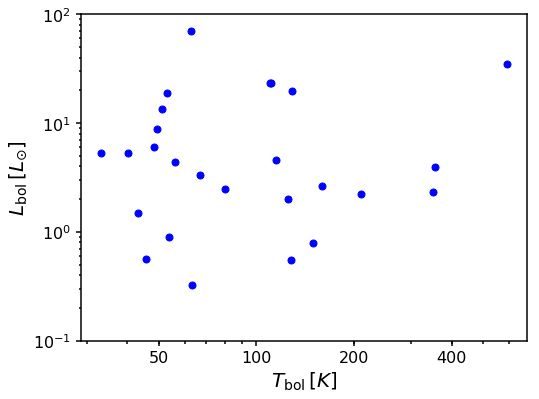

In [8]:
import numpy as np
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(t_bol_list, l_bol_list, marker='o', linestyle='None', color='b', markersize=7)

ax.set_xlabel(r'$T_{\rm bol}\,[K]$', fontsize=20)
ax.set_ylabel(r'$L_{\rm bol}\,[L_{\odot}]$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks([50, 100, 200, 400])
ax.set_xticklabels(['50','100','200','400'])
ax.set_ylim([0.1,100])

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'lbol_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Alpha at 500 um

In [6]:
# alpha500_list = []
for o in obj_list:
#     alpha500_list.append(ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])
    print(o, ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])

RCrA-IRS7B 2.767245
RCrA-IRS7C 2.812113
HH46 2.432405
L723-MM 2.155815
L1014 1.854385
L1157 2.273077
Ced110 2.340313
BHR71 2.589369
IRAS03245 2.472901
L1551-IRS5 2.736309
L1455-IRS3 1.54925
B1-a 1.743049
B1-c 2.084786
IRAS03301 2.067377
TMR1 2.386842
TMC1A 2.28547
TMC1 2.004424
IRAS15398 2.437274
RNO91 2.456058
GSS30-IRS1 2.66792
VLA1623 2.660031
WL12 2.409173
RCrA-IRS5A 2.56084
L483 2.529062
B335 2.297253
DKCha 2.077604


## $\alpha_{NIR}$

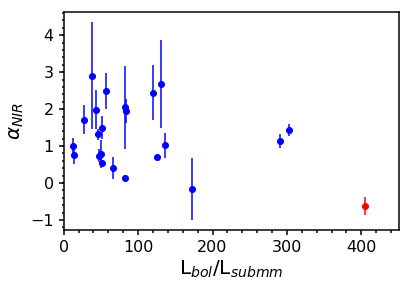

In [169]:
# Alpha NIR vs L_bol/L_submm
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)

selector = (np.array(alpha_nir_list) != -999)
ax.errorbar(np.array(l_bol_list)[selector]/np.array(lsubmm_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None', color='b')
# for DK Cha
dkcha = (np.array(obj_list) == 'DKCha')
ax.errorbar(np.array(l_bol_list)[dkcha]/np.array(lsubmm_list)[dkcha]-1000,
             np.array(alpha_nir_list)[dkcha], 
             yerr=np.array(alpha_nir_err_list)[dkcha],
             marker='o', linestyle='None', color='r')

ax.set_xlim([0,450])
ax.set_xlabel(r'L$_{bol}$/L$_{submm}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'alphanir_lsmm.pdf', format='pdf', dpi=300, bbox_inches='tight')

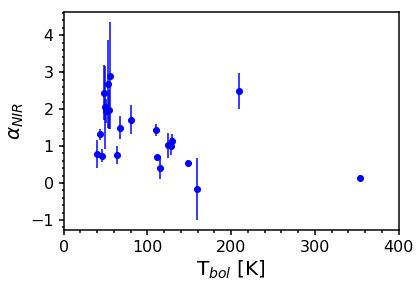

In [170]:
# Alpha NIR vs T_bol
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)

selector = (np.array(alpha_nir_list) != -999)
ax.errorbar(np.array(t_bol_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None', color='b')

ax.set_xlim([0,400])
ax.set_xlabel(r'T$_{bol}$ [K]', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

fig.savefig(plotdir+'alphanir_tbol.pdf', format='pdf', dpi=300, bbox_inches='tight')

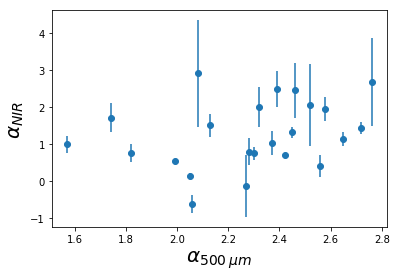

In [35]:
# Alpha NIR vs Alpha 500 um
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(alpha500_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlabel(r'$\alpha_{500\,\mu m}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

## Line detection statistics

In [7]:
%matplotlib inline
import os
from astropy.io import ascii
import numpy as np

data = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
total_obj = list(set(data['Object']))
# print(set(data['Object']), len(list(set(data['Object']))))

print(total_obj, len(total_obj))

def DetectionInSource(species, data):
    
    # get the index of the line list for the given species
    selector = np.zeros_like(data['Line'], dtype=bool)
    for i in range(len(data['Line'])):
        if species in data['Line'][i]:
            selector[i] = True
            
    # if species == 'CO', check further to exclude 13CO
    if species == 'CO':
        for i in range(len(data['Line'])):
            if '13CO' in data['Line'][i]:
                selector[i] = False
    
    obj_detection = list(set(data['Object'][selector]))
    
    return obj_detection

species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI3P2-3P1', 'CI3P1-3P0', 'CII']
cutter_pacs = (data['SNR'] >= 3) & (data['Validity'] == 1) & (data['ObsWL(um)'] <= 195.05)
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['ObsWL(um)'] > 195.05)
# positiver = (data['Str(W/cm2)'] >= 0)
for s in species_list:
    print('PACS')
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_pacs]))])
    print('SPIRE')
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_spire]))])


['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483', 'TMC1'] 27
PACS
CO ['IRAS15398', 'HH46', 'RNO91', 'Ced110', 'L723-MM', 'HH100', 'L483']
SPIRE
CO []
PACS
13CO ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483', 'TMC1']
SPIRE
13CO ['IRAS15398', 'B1-a', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'RNO91', 'B335', 'L1157', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
PACS
HCO+ ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157

In [8]:
# only count lines with positive fluxes
species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter_pacs = (data['SNR'] >= 3) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0) & (data['ObsWL(um)'] <= 195.05)
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0) & (data['ObsWL(um)'] > 195.05)
for s in species_list:
    print('PACS')
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_pacs]))])
    print('SPIRE')
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_spire]))])

PACS
CO ['IRAS15398', 'HH46', 'RNO91', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'L483']
SPIRE
CO []
PACS
13CO ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483', 'TMC1']
SPIRE
13CO ['IRAS15398', 'B1-a', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'RNO91', 'B335', 'L1157', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
PACS
HCO+ ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483', 'TMC1']
SPIRE
HCO+ ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'DKCha', 'B335', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L7

In [9]:
species_list = ['CO4-3','CO5-4','CO6-5','CO7-6','CO8-7','CO9-8','CO10-9','CO11-10','CO12-11','CO13-12','CO14-13']
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0) & (data['ObsWL(um)'] > 195.05)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_spire]))])

CO4-3 ['L1014']
CO5-4 ['L1455-IRS3']
CO6-5 []
CO7-6 ['L1014']
CO8-7 ['L1455-IRS3', 'L1014']
CO9-8 ['L1455-IRS3', 'L1014']
CO10-9 ['L1455-IRS3', 'L1014']
CO11-10 ['L1455-IRS3', 'L1014']
CO12-11 ['L1455-IRS3', 'L1014']
CO13-12 ['L1014']
CO14-13 ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483', 'TMC1']


In [10]:
species_list = ['13CO5-4','13CO6-5','13CO7-6','13CO8-7','13CO9-8','13CO10-9','13CO11-10',
                '13CO12-11','13CO13-12']
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0) & (data['ObsWL(um)'] > 195.05)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter_spire]))])
    
print('Line found in the following sources')
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter_spire]))])

13CO5-4 ['IRAS15398', 'B1-a', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'RNO91', 'TMR1', 'B335', 'L1157', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
13CO6-5 ['IRAS15398', 'B1-a', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'RNO91', 'DKCha', 'B335', 'L1551-IRS5', 'L1157', 'L1014', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
13CO7-6 ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'DKCha', 'B335', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
13CO8-7 ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'DKCha', 'B335', 'L1551-IRS5', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
13CO9-8 ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'RNO91', 'TMR1', 'DKCha', 'B335', 'L1157', 'Ced110', 'L1014', 'L723-MM', 'BHR71', 'B1-c', 'L483', 'TMC1']
13CO10-9 ['IRAS15398', 'B1-a', 'HH46', 'IRAS

In [11]:
# show sources with detections
species_list = ['HCO+6-5','HCO+7-6','HCO+8-7','HCO+9-8','HCO+10-9','HCO+11-10','HCO+12-11','HCO+13-12','HCO+14-13',
                'HCO+15-14','HCO+16-15']
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['ObsWL(um)'] > 195.05)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter_spire]))])

HCO+6-5 ['RCrA-IRS7B', 'RCrA-IRS7C', 'HH100', 'RCrA-IRS5A']
HCO+7-6 ['RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1', 'HH100', 'RCrA-IRS5A']
HCO+8-7 ['RCrA-IRS7B', 'RCrA-IRS7C', 'HH100', 'RCrA-IRS5A']
HCO+9-8 []
HCO+10-9 ['HH100']
HCO+11-10 []
HCO+12-11 []
HCO+13-12 []
HCO+14-13 []
HCO+15-14 []
HCO+16-15 []


## detail water line detection stats

In [12]:
species_list =  ['H2O','p-H2O1_11-0_00','p-H2O2_11-2_02','o-H2O1_10-1_01','o-H2O3_12-2_21','o-H2O3_12-3_03','p-H2O2_02-1_11']
cutter_pacs = (data['SNR'] >= 3) & (data['Validity'] == 1) & (data['ObsWL(um)'] <= 195.05)
cutter_spire = (data['SNR'] >= 4) & (data['Validity'] == 1) & (data['ObsWL(um)'] > 195.05)
for s in species_list:
    print('PACS')
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter_pacs]))])
    print('SPIRE')
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter_spire]))])

PACS
H2O ['B1-a', 'IRAS03245', 'L1455-IRS3', 'TMC1A', 'IRAS03301', 'WL12', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1551-IRS5', 'L1157', 'L1014', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'TMC1']
SPIRE
H2O ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'B335', 'GSS30-IRS1', 'L1157', 'L723-MM', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483']
PACS
p-H2O1_11-0_00 []
SPIRE
p-H2O1_11-0_00 ['IRAS15398', 'B1-a', 'HH46', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'B335', 'GSS30-IRS1', 'L1157', 'HH100', 'RCrA-IRS5A', 'BHR71', 'VLA1623', 'B1-c', 'L483']
PACS
p-H2O2_11-2_02 []
SPIRE
p-H2O2_11-2_02 ['IRAS15398', 'L1157', 'BHR71', 'B1-c']
PACS
o-H2O1_10-1_01 []
SPIRE
o-H2O1_10-1_01 ['IRAS15398', 'B1-a', 'RCrA-IRS7B', 'RCrA-IRS7C', 'L1157', 'RCrA-IRS5A', 'BHR71', 'B1-c']
PACS
o-H2O3_12-2_21 []
SPIRE
o-H2O3_12-2_21 ['IRAS15398', 'B1-a', 'HH46', 'IRAS03245', 'TMR1', 'RCrA-IRS7B', 'RCrA-IRS7C', 'DKCha', 'GSS30-IRS1', 'L1157', 'HH1

## Number of lines found in 1D SPIRE spectra

In [75]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] == 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

323
25


## Number of lines found in SPIRE cube spectra

In [76]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] != 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

3068
27


# FOOSH comparison with COPS-SPIRE

In [ ]:
# read in Table 6 from Green et al. (2013)
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.constants as const
import numpy as np

pc = const.pc.cgs.value
LS = const.L_sun.cgs.value

foosh = ascii.read('/Volumes/SD-Mac/Dropbox/real_cops-spire/foosh_table6.txt')
# foosh = ascii.read('/Volumes/SD-Mac/CDF_archive_lines.txt')
# foosh = foosh[(foosh['Pixel_No.'] == 'c') & (foosh['Validity'] == 1) & (foosh['SNR'] >= 5)]

cops = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
cops = cops[(cops['Pixel_No.'] == 'c') & (cops['Validity'] == 1) & (cops['SNR'] >= 5)]

for i, line in enumerate(foosh['Line'].data):
    # focus on CO lines now
    if len(line.split('CO')[0]) != 0:
        continue
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for j, obj in enumerate(cops['Object'][cops['Line'] == line]):
        d, = ax.plot(j, cops['Str(W/cm2)'][cops['Line'] == line][j]*1e7*4*np.pi*\
                     (dist['distance'][dist['object'] == obj]*pc)**2/LS, 'bo')
    # FOOSH
    foosh_source = ['HBC722', 'V1735Cyg', 'V1057Cyg', 'V1331Cyg', 'V1515Cyg', 'FUOri']
    for f_obj in foosh_source:
        if len(foosh[f_obj][(foosh['Line'] == line) & (foosh[f_obj] >= 0)]) == 0:
            continue
        ax.plot(foosh_source.index(f_obj), 
                foosh[f_obj][(foosh['Line'] == line) & (foosh[f_obj] >= 0)]*1e-22*1e7*4*np.pi*\
                (dist['distance'][dist['object'] == f_obj]*pc)**2/LS, 'ro')
    
    
    
#     ax.set_yscale('log')
    
    ax.legend([d], [line], fontsize=16, loc='best')

### Use CDF data

/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log10
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in log10
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in log10
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in double_scalars


No fitting result for 1D spectrum of HH100 found
No fitting result for 1D spectrum of V1735Cyg found


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in subtract
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in subtract
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:104: RuntimeWarning: invalid value encountered in multiply


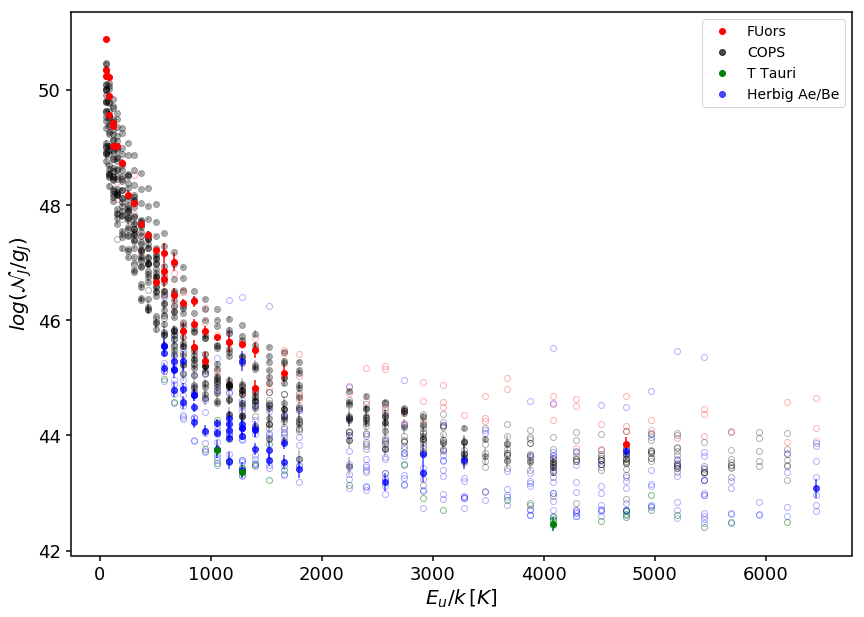

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.constants as const
import numpy as np
import os

pc = const.pc.cgs.value
LS = const.L_sun.cgs.value

cdf_v1_dir = '/home/bettyjo/yaolun/FWD_archive/CDF_archive/'
cdf_table_pacs = cdf_v1_dir+'CDF_archive_pacs_1d_lines.txt'
cdf_table_spire = cdf_v1_dir+'CDF_archive_spire_1d_lines.txt'
cdf = ascii.read(cdf_v1_dir+'CDF_archive_lines.txt')

cops_table = archive_dir+'CDF_archive_v2_lines.txt'
cops = ascii.read(cops_table)

# list of FOOSH source
foosh_source = ['HBC722', 'V1735Cyg', 'V1057Cyg', 'V1331Cyg', 'V1515Cyg', 'FUOri']
cmap = plt.cm.Set2
colorlist = [cmap(np.linspace(0,0.8, len(foosh_source))[i]) for i in range(len(foosh_source))]
foosh_plot = []
foosh_source_label = []

# list of T Tauri and Herbig Ae/Be
TT = ['SCrA', 'HTLup', 'RULup', 'RYLup', 'SR21']
herbig = ['ABAur', 'AS205', 'HD100453', 'HD100546', 'HD104237',
          'HD135344B', 'HD139614', 'HD141569', 'HD142527', 'HD142666',
          'HD144432', 'HD144668', 'HD150193', 'HD163296', 'HD169142',
          'HD179218', 'HD203024', 'HD245906', 'HD35187', 'HD36112',
          'HD38120', 'HD50138', 'HD97048', 'HD98922']

# use rotational diagram to investigate the behavior of CO between FUor and COPS sources
# create figure object to plot on
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

# calculate quantities of rotational diagram for FOOSH
for i, o in enumerate(list(set(cops['Object']))):
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], cops_table, opt_correction=16.0)
    if type(non_mask) == float:
        continue
    ax.errorbar(x[non_mask], y[non_mask], yerr=y_sig[non_mask], color='k',
                marker='o', linestyle='None', alpha=0.3)
    # non-detection
    ax.plot(x[~non_mask], y[~non_mask], color='k',
            marker='o', mfc='None', linestyle='None', alpha=0.3)
    
for i, o in enumerate(list(set(cdf['Object']))):
    if o in foosh_source:
        x_pacs, y_pacs, y_sig_pacs, non_mask_pacs = pop_dia_1d(o, dist['distance'][dist['object'] == o], cdf_table_pacs,
                                                               opt_correction=16.0, spire_snr_threshold=5)
        x_spire, y_spire, y_sig_spire, non_mask_spire = pop_dia_1d(o, dist['distance'][dist['object'] == o], cdf_table_spire,
                                                                   opt_correction=16.0, spire_snr_threshold=5)
        # PACS
        if type(non_mask_pacs) != float:
            ax.errorbar(x_pacs[non_mask_pacs], y_pacs[non_mask_pacs],
                                         yerr=y_sig_pacs[non_mask_pacs],
                                         color='r', marker='o', linestyle='None', alpha=1)
            # non-detection
            ax.plot(x_pacs[~non_mask_pacs], y_pacs[~non_mask_pacs],
                    color='r', marker='o', mfc='None', linestyle='None', alpha=0.3)
        # SPIRE
        if type(non_mask_spire) != float:
            ax.errorbar(x_spire[non_mask_spire], y_spire[non_mask_spire],
                                         yerr=y_sig_spire[non_mask_spire],
                                         color='r', marker='o', linestyle='None', alpha=1)
            # non-detection
            ax.plot(x_spire[~non_mask_spire], y_spire[~non_mask_spire],
                    color='r', marker='o', mfc='None', linestyle='None', alpha=0.3)

# Herbig
for i, o in enumerate(list(set(cdf['Object']))):
    if o in herbig:
        fitting_table = cdf_v1_dir+o+'/pacs/advanced_products/'+o+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt'
        x_pacs, y_pacs, y_sig_pacs, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table,
                                                          opt_correction=16.0, spire_snr_threshold=5)
        if type(non_mask) == float:
            continue
        ax.errorbar(x_pacs[non_mask], y_pacs[non_mask], yerr=y_sig_pacs[non_mask],
                                     color='b',marker='o', linestyle='None', alpha=0.7)
        # non-detection
        ax.plot(x_pacs[~non_mask], y_pacs[~non_mask],
                color='b', marker='o', mfc='None', linestyle='None', alpha=0.3)

# T Tauri
for i, o in enumerate(list(set(cdf['Object']))):
    if o in TT:
        fitting_table = cdf_v1_dir+o+'/pacs/advanced_products/'+o+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt'
        x_pacs, y_pacs, y_sig_pacs, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table,
                                                          opt_correction=16.0, spire_snr_threshold=5)
        if type(non_mask) == float:
            continue
        TT_plot_dum = ax.errorbar(x_pacs[non_mask], y_pacs[non_mask], yerr=y_sig_pacs[non_mask],
                                  color='g', marker='o', linestyle='None', alpha=1.0)
        # non-detection
        ax.plot(x_pacs[~non_mask], y_pacs[~non_mask],
                color='g', marker='o', mfc='None', linestyle='None', alpha=0.5)

# create plot object for plotting legend
cops_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                        color='k', marker='o', linestyle='None', alpha=0.7)
foosh_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                         color='r', marker='o', linestyle='None', alpha=1)
TT_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                      color='g', marker='o', linestyle='None', alpha=1)
herbig_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                          color='b', marker='o', linestyle='None', alpha=0.7)

ax.legend([foosh_plot[0], cops_plot[0], TT_plot[0], herbig_plot[0]],
               ['FUors', 'COPS','T Tauri', 'Herbig Ae/Be'],
               fontsize=14, loc='best')
ax.set_xlabel(r'$E_{u}/k\,[K]$', fontsize=20)
ax.set_ylabel(r'$log(\mathcal{N}_{J}/g_{J})$', fontsize=20)
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
fig.savefig(plotdir+'fuors_cops_co_rot_dia.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Average the data in each source catagories

/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in double_scalars
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log10
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in log10
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in log10


No fitting result for 1D spectrum of V1735Cyg found


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in subtract
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in subtract
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:104: RuntimeWarning: invalid value encountered in multiply


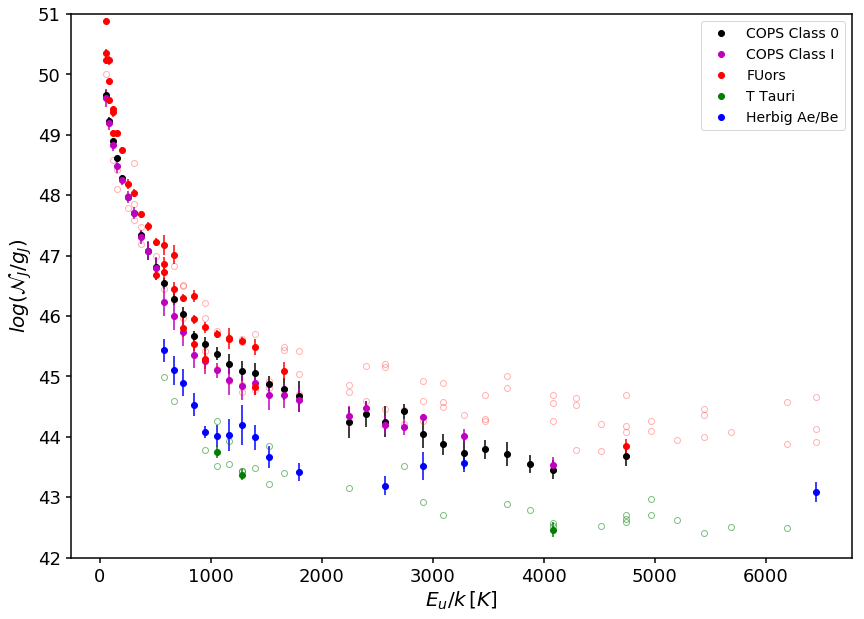

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.constants as const
import numpy as np
import os

pc = const.pc.cgs.value
LS = const.L_sun.cgs.value

cdf_v1_dir = '/home/bettyjo/yaolun/FWD_archive/CDF_archive/'
cdf_table_pacs = cdf_v1_dir+'CDF_archive_pacs_1d_lines.txt'
cdf_table_spire = cdf_v1_dir+'CDF_archive_spire_1d_lines.txt'
cdf = ascii.read(cdf_v1_dir+'CDF_archive_lines.txt')

cops_table = archive_dir+'CDF_archive_v2_lines.txt'
cops = ascii.read(cops_table)
# take only the fitting results from 1D spectra
cops = cops[cops['Pixel_No.'] == 'c']

# list of FOOSH source
foosh_source = ['HBC722', 'V1735Cyg', 'V1057Cyg', 'V1331Cyg', 'V1515Cyg', 'FUOri']
cmap = plt.cm.Set2
colorlist = [cmap(np.linspace(0,0.8, len(foosh_source))[i]) for i in range(len(foosh_source))]
foosh_plot = []
foosh_source_label = []

# list of T Tauri and Herbig Ae/Be
TT = ['SCrA', 'HTLup', 'RULup', 'RYLup', 'SR21']
herbig = ['ABAur', 'AS205', 'HD100453', 'HD100546', 'HD104237',
          'HD135344B', 'HD139614', 'HD141569', 'HD142527', 'HD142666',
          'HD144432', 'HD144668', 'HD150193', 'HD163296', 'HD169142',
          'HD179218', 'HD203024', 'HD245906', 'HD35187', 'HD36112',
          'HD38120', 'HD50138', 'HD97048', 'HD98922']

# use rotational diagram to investigate the behavior of CO between FUor and COPS sources
# create figure object to plot on
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

# calculate quantities of rotational diagram 
# COPS

x_ref = [55.32,82.97,116.16,154.87,199.11,
         248.88,304.16,364.97,431.29,503.13,
         580.49,663.35,751.72,845.59,944.97,
         1049.84,1160.20,1276.05,1397.38,1524.19,
         1656.47,1794.23,1937.44,2086.12,2240.24,
         2399.82,2564.83,2735.28,2911.15,3092.45,
         3279.15,3471.27,3668.78,3871.69,4079.98,
         4293.64,4512.67,4737.13,4966.88,5201.97,
         5442.40,5688.14,5939.21,6195.57,6457.23,
         6724.18]
classI = ['L1455-IRS3','IRAS03301','B1-a','L1551-IRS5','TMR1',
          'TMC1A','TMC1','RCrA-IRS5A','RCrA-IRS7C','RNO91',
          'WL12','HH46','GSS30-IRS1']
cops_y_dict = {}
cops_y_sig_dict = {}
herbig_y_dict = {}
herbig_y_sig_dict = {}
for x in x_ref:
    cops_y_dict[str(x)] = []
    cops_y_sig_dict[str(x)] = []
    herbig_y_dict[str(x)] = []
    herbig_y_sig_dict[str(x)] = []

# Class 0 loop
for i, o in enumerate(list(set(cops['Object']))):
    if o in classI:
        continue
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], cops_table, opt_correction=16.0)
    if type(non_mask) == float:
        continue

    for x_dum in x[non_mask]:
        cops_y_dict[str(x_dum)].append(y[non_mask][x[non_mask] == x_dum].data)
        cops_y_sig_dict[str(x_dum)].append(y_sig[non_mask][x[non_mask] == x_dum].data)
        
for k in cops_y_dict.keys():
    if len(cops_y_dict[k]) > 0:
        cops_y_dict[k] = np.squeeze(cops_y_dict[k])
        cops_y_sig_dict[k] = np.squeeze(cops_y_sig_dict[k])
        ax.errorbar(float(k), np.mean(cops_y_dict[k]), yerr=np.sum(cops_y_sig_dict[k]**2)**0.5,
                    color='k', marker='o', linestyle='None', alpha=1)
# re-initiate the dictionary
cops_y_dict = {}
cops_y_sig_dict = {}
for x in x_ref:
    cops_y_dict[str(x)] = []
    cops_y_sig_dict[str(x)] = []
# Class I loop
for i, o in enumerate(list(set(cops['Object']))):
    if o not in classI:
        continue
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], cops_table, opt_correction=16.0)
    if type(non_mask) == float:
        continue

    for x_dum in x[non_mask]:
        cops_y_dict[str(x_dum)].append(y[non_mask][x[non_mask] == x_dum].data)
        cops_y_sig_dict[str(x_dum)].append(y_sig[non_mask][x[non_mask] == x_dum].data)
        
for k in cops_y_dict.keys():
    if len(cops_y_dict[k]) > 0:
        cops_y_dict[k] = np.squeeze(cops_y_dict[k])
        cops_y_sig_dict[k] = np.squeeze(cops_y_sig_dict[k])
        ax.errorbar(float(k), np.mean(cops_y_dict[k]), yerr=np.sum(cops_y_sig_dict[k]**2)**0.5,
                    color='m', marker='o', linestyle='None', alpha=1)
        
# FUors
for i, o in enumerate(list(set(cdf['Object']))):
    if o in foosh_source:
        x_pacs, y_pacs, y_sig_pacs, non_mask_pacs = pop_dia_1d(o, dist['distance'][dist['object'] == o],
                                                    cdf_table_pacs, opt_correction=16.0, spire_snr_threshold=5)
        x_spire, y_spire, y_sig_spire, non_mask_spire = pop_dia_1d(o, dist['distance'][dist['object'] == o],
                                                    cdf_table_spire, opt_correction=16.0, spire_snr_threshold=5)
        
        # PACS
        if type(non_mask_pacs) != float:
            ax.errorbar(x_pacs[non_mask_pacs], y_pacs[non_mask_pacs],
                                         yerr=y_sig_pacs[non_mask_pacs],
                                         color='r', marker='o', linestyle='None', alpha=1)
            # non-detection
            ax.plot(x_pacs[~non_mask_pacs], y_pacs[~non_mask_pacs],
                    color='r', marker='o', mfc='None', linestyle='None', alpha=0.3)
        # SPIRE
        if type(non_mask_spire) != float:
            ax.errorbar(x_spire[non_mask_spire], y_spire[non_mask_spire],
                                         yerr=y_sig_spire[non_mask_spire],
                                         color='r', marker='o', linestyle='None', alpha=1)
            # non-detection
            ax.plot(x_spire[~non_mask_spire], y_spire[~non_mask_spire],
                    color='r', marker='o', mfc='None', linestyle='None', alpha=0.3)

# Herbig
for i, o in enumerate(list(set(cdf['Object']))):
    if o in herbig:
        fitting_table = cdf_v1_dir+o+'/pacs/advanced_products/'+o+\
                        '_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt'
        x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table,
                                           opt_correction=16.0, spire_snr_threshold=5)
        if type(non_mask) == float:
            continue
        for x_dum in x[non_mask]:
            herbig_y_dict[str(x_dum)].append(y[non_mask][x[non_mask] == x_dum].data)
            herbig_y_sig_dict[str(x_dum)].append(y_sig[non_mask][x[non_mask] == x_dum].data)
        
for k in herbig_y_dict.keys():
    if len(herbig_y_dict[k]) > 0:
        herbig_y_dict[k] = np.squeeze(herbig_y_dict[k])
        herbig_y_sig_dict[k] = np.squeeze(herbig_y_sig_dict[k])
        ax.errorbar(float(k), np.mean(herbig_y_dict[k]), yerr=np.sum(herbig_y_sig_dict[k]**2)**0.5,
                    color='b', marker='o', linestyle='None', alpha=1)

# T Tauri
for i, o in enumerate(list(set(cdf['Object']))):
    if o in TT:
        fitting_table = cdf_v1_dir+o+'/pacs/advanced_products/'+o+\
                        '_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt'
        x_pacs, y_pacs, y_sig_pacs, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table,
                                                          opt_correction=16.0, spire_snr_threshold=5)
        if type(non_mask) == float:
            continue
        TT_plot_dum = ax.errorbar(x_pacs[non_mask], y_pacs[non_mask], yerr=y_sig_pacs[non_mask],
                                  color='g', marker='o', linestyle='None', alpha=1.0)
        # non-detection
        ax.plot(x_pacs[~non_mask], y_pacs[~non_mask],
                color='g', marker='o', mfc='None', linestyle='None', alpha=0.5)

# create plot object for plotting legend
class0_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                        color='k', marker='o', linestyle='None', alpha=1)
class1_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                        color='m', marker='o', linestyle='None', alpha=1)
foosh_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                         color='r', marker='o', linestyle='None', alpha=1)
TT_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                      color='g', marker='o', linestyle='None', alpha=1)
herbig_plot = ax.errorbar([np.nan],[np.nan], yerr=np.nan,
                          color='b', marker='o', linestyle='None', alpha=1)

ax.legend([class0_plot[0], class1_plot[0], foosh_plot[0], TT_plot[0], herbig_plot[0]],
               ['COPS Class 0', 'COPS Class I', 'FUors', 'T Tauri', 'Herbig Ae/Be'],
               fontsize=14, loc='best')

ax.set_ylim([42,51])
ax.set_xlabel(r'$E_{u}/k\,[K]$', fontsize=20)
ax.set_ylabel(r'$log(\mathcal{N}_{J}/g_{J})$', fontsize=20)
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
fig.savefig(plotdir+'fuors_cops_co_rot_dia_avg.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [215]:
data = ascii.read(cdf_table_pacs)
for i, o in enumerate(list(set(cdf['Object']))):
    if o in foosh_source:
        print(o)
        data_dum = data[(data['Object'] == o) & (data['Validity'] == 1)]
        for j in range(len(data_dum)):
            if ('CO' in data_dum['Line'][j]) & (data_dum['E_u(K)'][j] >= 6000):
                print(data_dum['Line'][j], data_dum['E_u(K)'][j], data_dum['SNR'][j])

V1515Cyg
CO48-47 6457.23 1.098978
CO47-46 6195.57 2.504055
V1735Cyg
CO47-46 6195.57 1.801565
FUOri
CO48-47 6457.23 0.935803
CO47-46 6195.57 0.201119
V1331Cyg
V1057Cyg
CO48-47 6457.23 1.240856


## Comparison with disk sources (van der Wiel 2014)

In [ ]:
# read in Table 3 from van der Wiel et al. (2014)
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.constants as const
import numpy as np

pc = const.pc.cgs.value
LS = const.L_sun.cgs.value

disk = ascii.read('/Volumes/SD-Mac/Dropbox/real_cops-spire/vdW_table3.txt')

cops = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
cops = cops[(cops['Pixel_No.'] == 'c') & (cops['Validity'] == 1) & (cops['SNR'] >= 5)]

for i, line in enumerate(disk['Line'].data):
    # focus on CO lines now
    if len(line.split('CO')[0]) != 0:
        continue
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    

    for j, obj in enumerate(cops['Object'][cops['Line'] == line]):
        d, = ax.plot(j, cops['Str(W/cm2)'][cops['Line'] == line][j]*1e7*4*np.pi*\
                     (dist['distance'][dist['object'] == obj]*pc)**2/LS, 'bo')
    # disk sources in vdW
    disk_source = ['HD100546', 'HD97048', 'ABAur', 'HD163296', 'DRTau', 'FZTau']
    for d_obj in disk_source:
        if len(disk[d_obj][(disk['Line'] == line) & (disk[d_obj] >= 0)]) == 0:
            continue

        ax.errorbar(disk_source.index(d_obj), 
                    disk[d_obj][(disk['Line'] == line)]*1e-22*1e7*4*np.pi*\
                    (dist['distance'][dist['object'] == d_obj]*pc)**2/LS,
                    yerr=disk[d_obj+'_unc'][(disk['Line'] == line)]*1e-22*1e7*4*np.pi*\
                    (dist['distance'][dist['object'] == d_obj]*pc)**2/LS,
                    marker='o', color='r')
    
    ax.legend([d], [line], fontsize=16, loc='best')

# CO optical depth analysis

In [195]:
# compare the ratio of the line fluxes between 12CO and 13CO with the abundance ratio of 12C to 13C

# get the source that both 12Co and 13CO are detected at the same J transition
from astropy.io import ascii
import numpy as np
fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')

# get only 1D spectra
fitting = fitting[fitting['Pixel_No.'] == 'c']

# possible J transitions for 13CO lines
J_up = np.array([5,6,7,8,9,10])

# select sources
selected = {'Object':[], 'J_up':[], '12CO/13CO':[], 'unc':[]}
selector = (fitting['SNR'] >= 4.0) & (fitting['Validity'] == 1)
for o in list(set(fitting['Object'])):
    for j in J_up:
        co12 = fitting[(fitting['Line'] == 'CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & selector]
        co13 = fitting[(fitting['Line'] == '13CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & selector]
        if len(co12)+len(co13) == 2:
            print(o,j)
            selected['Object'].append(o)
            selected['J_up'].append(j)
            selected['12CO/13CO'].append(co12['Str(W/cm2)'].data[0]/co13['Str(W/cm2)'].data[0])
            comb_noise = ((1/co12['SNR'].data[0])**2+(1/co13['SNR'].data[0])**2)**0.5*\
                                       (co12['Str(W/cm2)'].data[0]/co13['Str(W/cm2)'].data[0])
            selected['unc'].append(comb_noise)
        else:
            selected['Object'].append(o)
            selected['J_up'].append(j)
            co12_dum = fitting[(fitting['Line'] == 'CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & selector]
            co13_dum = fitting[(fitting['Line'] == '13CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o) & fitting['Validity'] == 1]
            # fail safe if not even 12CO is detected
            if len(co12_dum) == 0:
                print('12CO not detected at ', o, j)
                co12_dum = fitting[(fitting['Line'] == 'CO'+str(j)+'-'+str(j-1)) & (fitting['Object'] == o)]
                # use both fluxes from upper limits.  However, it is not clear whether the end product is an upper
                # limit or lower limit.  Maybe I use just don't use those lines.  Some CO lines not detected toward
                # IRAS 03301, L1455-IRS3, and L1014.
#                 selected['12CO/13CO'].append(
#                     (5*co12_dum['Str(W/cm2)'].data[0]/co12_dum['SNR'].data[0])/\
#                     (5*co13_dum['Str(W/cm2)'].data[0]/co13_dum['SNR'].data[0]))
                selected['12CO/13CO'].append(np.nan)
            elif len(co13_dum) != 0:    
                # store the upper limit of 13CO, therefore the lower limit of the ratio of 12CO/13CO instead of an
                # actual number
                selected['12CO/13CO'].append(
                    co12_dum['Str(W/cm2)'].data[0]/(5*co13_dum['Str(W/cm2)'].data[0]/co13_dum['SNR'].data[0]))
            else:
                selected['12CO/13CO'].append(np.nan)
            # this NaN will be use as a flag when plotting
            selected['unc'].append(np.nan)
for k in selected.keys():
    selected[k] = np.array(selected[k])

WL12 5
WL12 6
GSS30-IRS1 5
GSS30-IRS1 6
GSS30-IRS1 7
GSS30-IRS1 9
TMR1 6
L1551-IRS5 5
L1551-IRS5 9
12CO not detected at  L1455-IRS3 5
12CO not detected at  L1455-IRS3 8
12CO not detected at  L1455-IRS3 9
12CO not detected at  L1455-IRS3 10
RCrA-IRS7C 5
RCrA-IRS7C 6
RCrA-IRS7C 7
RCrA-IRS7C 8
RCrA-IRS7C 9
12CO not detected at  L1014 5
12CO not detected at  L1014 6
12CO not detected at  L1014 7
12CO not detected at  L1014 8
12CO not detected at  L1014 9
12CO not detected at  L1014 10
HH46 5
HH46 6


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars


RCrA-IRS7B 5
RCrA-IRS7B 6
RCrA-IRS7B 7
RCrA-IRS7B 8
RCrA-IRS7B 9
VLA1623 5
VLA1623 6
VLA1623 9
DKCha 5
Ced110 5
Ced110 6
12CO not detected at  IRAS03301 8
RCrA-IRS5A 5
RCrA-IRS5A 6


Plot only detections

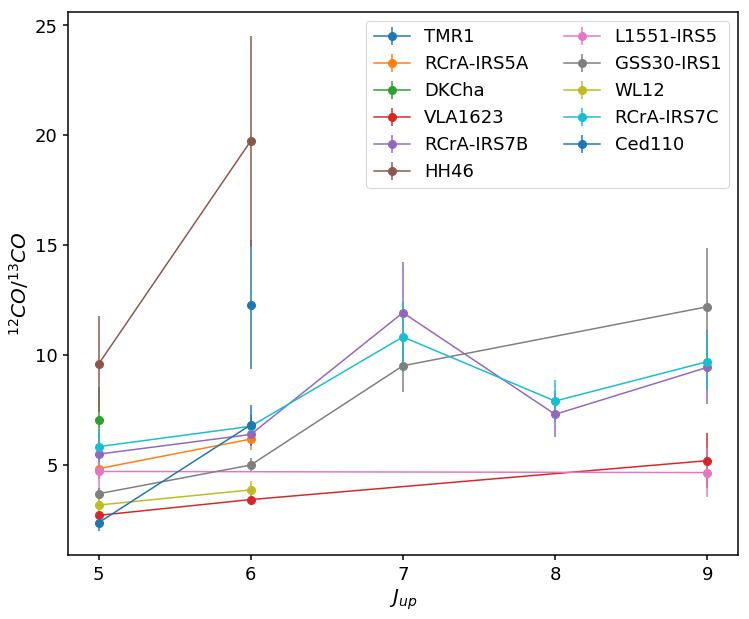

In [29]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for o in list(set(selected['Object'])):
    selector = (selected['Object'] == o)
    lower_limit_flag = np.isnan(selected['unc'])
    # this statement will skip the object that don't have 13CO detection at all.
    # comment it now, because it may be interesting to plot other points as lower limits.
#     if len(selected['J_up'][(np.isnan(selected['12CO/13CO'][selector]) == False)]) == 0:
#         continue
    # detections at both 12CO and 13CO
    if len(selected['J_up'][selector & np.logical_not(lower_limit_flag)]) != 0:
        ax.errorbar(selected['J_up'][selector & np.logical_not(lower_limit_flag)],
                    selected['12CO/13CO'][selector & np.logical_not(lower_limit_flag)],
                    yerr=selected['unc'][selector & np.logical_not(lower_limit_flag)],
                    marker='o', markersize=8, label=o)

ax.legend(fontsize=18, loc='best', ncol=2)

ax.set_xlabel(r'$J_{up}$', fontsize=20)
ax.set_ylabel(r'$^{12}CO/^{13}CO$', fontsize=20)
ax.set_xticks([5,6,7,8,9])
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

fig.savefig(plotdir+'co_optical_depth_str.pdf',format='pdf',dpi=300,bbox_inches='tight')


Plot both detections and upper limits

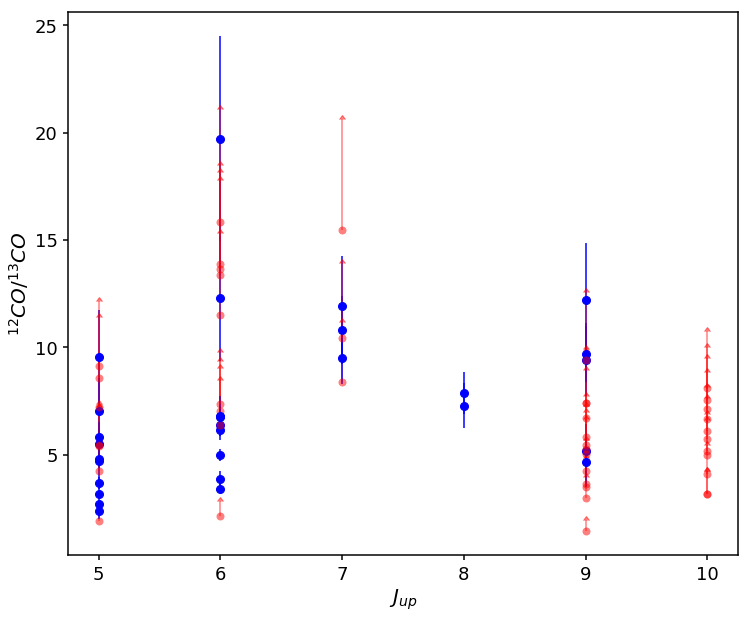

In [30]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for o in list(set(selected['Object'])):
    selector = (selected['Object'] == o)
    lower_limit_flag = np.isnan(selected['unc'])
    # this statement will skip the object that don't have 13CO detection at all.
    # comment it now, because it may be interesting to plot other points as lower limits.
#     if len(selected['J_up'][(np.isnan(selected['12CO/13CO'][selector]) == False)]) == 0:
#         continue
    # detections at both 12CO and 13CO
    if len(selected['J_up'][selector & np.logical_not(lower_limit_flag)]) != 0:
        ax.errorbar(selected['J_up'][selector & np.logical_not(lower_limit_flag)],
                    selected['12CO/13CO'][selector & np.logical_not(lower_limit_flag)],
                    yerr=selected['unc'][selector & np.logical_not(lower_limit_flag)],
                    marker='o', markersize=8, color='b', linestyle='None') # label=o
    else:
        ax.errorbar(selected['J_up'][selector & lower_limit_flag],
                    selected['12CO/13CO'][selector & lower_limit_flag],
                    yerr=selected['12CO/13CO'][selector & lower_limit_flag]/3,
                    marker='o', markersize=8, color='r', linestyle='None', lolims=True,
                    markeredgecolor='None', alpha=0.5)    

# ax.legend(fontsize=18, loc='best', ncol=2)

ax.set_xlabel(r'$J_{up}$', fontsize=20)
ax.set_ylabel(r'$^{12}CO/^{13}CO$', fontsize=20)
ax.set_xticks([5,6,7,8,9,10])
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

fig.savefig(plotdir+'co_optical_depth_str_all.pdf',format='pdf',dpi=300,bbox_inches='tight')


## Effect of optical depth on estimating column density

<h1><center> N $\propto \int \frac{\tau_{\nu}T_{R}dv}{1-e^{-\tau}}$ </h1></center>

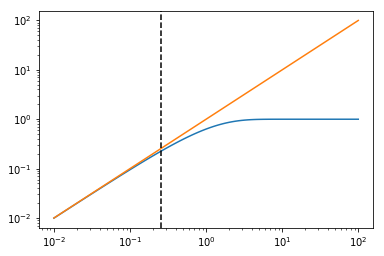

In [31]:
import numpy as np
tau_expo = np.linspace(-2,2,num=100)
tau = 10.0**tau_expo

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(tau, (1-np.exp(-tau)))
plt.plot(tau, tau)
plt.axvline(0.257, color='k', linestyle='--')
plt.xscale('log')
plt.yscale('log')

## Calculate the optical depth of 12CO

<h2><center>$\frac{F_{12}}{F_{13}} = \frac{J(T_{\rm ex,^{12}CO})}{J(T_{\rm ex,^{13}CO})} \frac{1-e^{-\tau_{12}}}{\tau_{13}}$ </center></h2>

assuming $T_{ex}$ are the same for both 12CO and 13CO

<h2><center>$\frac{F_{12}}{F_{13}} = \frac{1-e^{-\tau_{12}}}{\tau_{13}}$ </center></h2>

assuming 13CO is optically thin<br>

if we further assume $\tau_{12}/\tau_{13}$ = the abundance ratio of 12CO/13CO = 70 = R

<h2><center>$\frac{F_{12}}{F_{13}} = \frac{1-e^{-\tau_{12}}}{\tau_{12}/R}$</center></h2>

<h2><center>$e^{-\tau_{12}} = 1-\frac{F_{12}}{F_{13}}\frac{\tau_{12}}{R}$</center></h2>

The simpliest way to estimate $\tau_{12}$ is assuming 12CO is optically thick, therefore the equation reduce to

<h2><center>$\tau_{12} = R\frac{F_{13}}{F_{12}}$</center></h2>

In [32]:
# print the optical depth for each source
R = 70.0
for j in J_up:
    j_select = (selected['J_up'] == j)
    general_select = (np.isnan(selected['12CO/13CO']) == False) & (np.isnan(selected['unc']) == False)
    
    for i in range(len(selected['Object'][j_select & general_select])):
        print(selected['Object'][j_select & general_select][i], j, R/selected['12CO/13CO'][j_select & general_select][i])

RCrA-IRS5A 5 14.5411078923
DKCha 5 9.94712542746
VLA1623 5 26.0322694612
RCrA-IRS7B 5 12.7843608853
HH46 5 7.3145815967
L1551-IRS5 5 14.9308260208
GSS30-IRS1 5 19.0610551745
WL12 5 22.1606467105
RCrA-IRS7C 5 12.0380565324
Ced110 5 29.7197587192
TMR1 6 5.70335486782
RCrA-IRS5A 6 11.3652358394
VLA1623 6 20.5403751815
RCrA-IRS7B 6 10.9899806281
HH46 6 3.54889854153
GSS30-IRS1 6 14.0571648307
WL12 6 18.192324479
RCrA-IRS7C 6 10.3830676824
Ced110 6 10.2822263292
RCrA-IRS7B 7 5.87615073941
GSS30-IRS1 7 7.3717771791
RCrA-IRS7C 7 6.47579096713
RCrA-IRS7B 8 9.60689417743
RCrA-IRS7C 8 8.87105088041
VLA1623 9 13.517009406
RCrA-IRS7B 9 7.42778822116
L1551-IRS5 9 15.0978339594
GSS30-IRS1 9 5.74683915805
RCrA-IRS7C 9 7.23024379806


In [33]:
# Calculate the average ratio for each J-level from detections
tau = {'J_up':[], 'tau':[], 'tau_unc':[]}
numerical = False
# the abundance ratio of 12CO to 13CO
R = 70.0

for j in J_up:
    j_select = (selected['J_up'] == j)
    general_select = (np.isnan(selected['12CO/13CO']) == False) & (np.isnan(selected['unc']) == False)
    
    if not numerical:
        # use the optical thick assumption for 12CO
        tau['J_up'].append(j)
        tau['tau'].append(np.mean(R/selected['12CO/13CO'][j_select & general_select]))
        # error propagation for inversion
#         unc_dum = (selected['unc'][j_select & general_select])/(selected['12CO/13CO'][j_select & general_select])**2
        unc_dum = (R*selected['unc'][j_select & general_select]/selected['12CO/13CO'][j_select & general_select]**2)**0.5
        tau['tau_unc'].append((np.sum(unc_dum**2))**0.5)
    else:
        def func(tau, ratio, R):
            return np.exp(-tau)+ratio*tau/R-1
        from scipy.optimize import fsolve
        # initial guess of tau
        tau_0 = 5
        tau_dum = []
        for i in selected['12CO/13CO'][j_select & general_select]:
            ans, infodict, ier, msg = fsolve(func, tau_0, args=(i, R), full_output=True)
            tau_dum.append(ans[0])
        tau['J_up'].append(j)
        tau['tau'].append(np.mean(tau_dum))
        tau['tau_unc'].append(np.nan)
for k in tau.keys():
    tau[k] = np.array(tau[k])

/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
tau

{'J_up': array([ 5,  6,  7,  8,  9, 10]),
 'tau': array([ 16.85297884,  11.67362538,   6.57457296,   9.23897253,
          9.80394291,          nan]),
 'tau_unc': array([ 4.66891655,  3.16948709,  1.73999704,  1.57274736,  3.23543563,  0.        ])}

[[ 1.29645231]
 [-0.00155714]]
[[  1.07939400e-02  -5.76801809e-05]
 [ -5.76801809e-05   3.40613076e-07]]
[[ 832.58429775]]


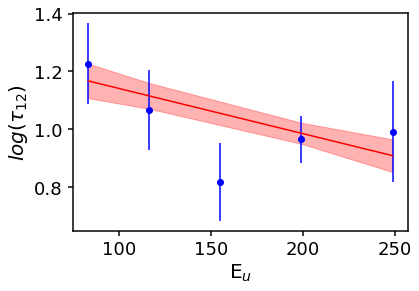

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

E_u = np.array([82.97, 116.16, 154.87, 199.11, 248.88, 304.16])

ax.errorbar(E_u, np.log10(tau['tau']),
            yerr=np.log10(tau['tau'])-np.log10(tau['tau']-tau['tau_unc']),
            marker='o', linestyle='None', color='b')
ax.set_xlabel(r'E$_{u}$', fontsize=20)
ax.set_ylabel(r'$log(\tau_{12})$', fontsize=20)
# ax.set_xticks([5,6,7,8,9])
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

# fit for linear relation
from leastsqfit import lin_leastsqfit
# exclude J_up = 7
selector = (tau['J_up'] != 7) & (np.isnan(tau['tau']) == False)

[y_fit, y_fit_err, p, cov, s_min] = lin_leastsqfit(E_u[selector],
                                                   np.log10(tau['tau'][selector]),
                                                   np.log10(tau['tau'][selector])-\
                                                   np.log10(tau['tau'][selector]-tau['tau_unc'][selector]))

# y_fit = p[1]*x + p[0]
print(p)
print(cov)
print(-p[0]/p[1])
ax.plot(E_u[selector], y_fit, color='r')
ax.fill_between(E_u[selector], y_fit-y_fit_err, y_fit+y_fit_err, color='r', edgecolor='None', alpha=0.3)
# E_u = 832.6 if tau_12 = 1, corresponding to the location between J=16-15 and J=17-16

# extrapolate the fitted relation and uncertainty
all_Eu = np.array([5.53, 16.60, 33.19, 55.32, 82.97,
                   116.16, 154.87, 199.11, 248.88, 304.16,
                   364.97, 431.29, 503.13, 580.49, 663.35,
                   751.72, 845.59, 944.97, 1049.84, 1160.20,
                   1276.05])
yfit_all = float(p[0])+all_Eu*float(p[1])
yfit_all_err = (cov[0,0]+2*cov[0,1]*all_Eu+cov[1,1]*all_Eu**2)**0.5

# ax.plot(all_Eu, yfit_all, 'o', linestyle='-', color='k', alpha=0.5)
# ax.fill_between(all_Eu, yfit_all-yfit_all_err, yfit_all+yfit_all_err, color='k', edgecolor='None', alpha=0.3)
# ax.axhline(0, color='g', linestyle='--')
# ax_up = ax.twiny()
# ax_up.set_xticks(all_Eu)
# ax_up.set_xticklabels(np.arange(1,22))

fig.savefig(plotdir+'co_optical_depth_fit.pdf',format='pdf',dpi=300,bbox_inches='tight')

# Investigate the changing of slopes in rotational diagrams

In [25]:
def tau_12co(E_u):
    p = [1.29645231, -0.00155714]
    return 10**(p[1]*E_u+p[0])
all_Eu = np.array([5.53, 16.60, 33.19, 55.32, 82.97,
                   116.16, 154.87, 199.11, 248.88, 304.16,
                   364.97, 431.29, 503.13, 580.49, 663.35,
                   751.72, 845.59, 944.97, 1049.84, 1160.20,
                   1276.05])
tau_12co(all_Eu)

array([ 19.40176883,  18.64677738,  17.56996245,  16.22973113,
        14.69793777,  13.04893079,  11.35789994,   9.69192767,
         8.10795457,   6.65016786,   5.34740311,   4.21573593,
         3.2584305 ,   2.46915362,   1.83452439,   1.33634634,
         0.95444366,   0.66834657,   0.45888562,   0.30892886,   0.20392187])

In [4]:
def pop_dia_1d(objname,dstar,fitting_table, opt_correction=None, spire_snr_threshold=4):
    """
    opt_correction is the largest J-level that need to be corrected from optical depth
    """
    import numpy as np
    import os
    import astropy.constants as const

    from astropy.io import ascii
    
    home = os.path.expanduser('~')

    # Constants Setup
    c = const.c.cgs.value
    h = const.h.cgs.value
    k = const.k_B.cgs.value
    B = 1.9225  # 192.25 m-1
    pc = const.pc.cgs.value

    # Re-write the input
    data = ascii.read(fitting_table)
    
    # add the Str(W/cm2) column if only Str(W/cm2/as2) is presented
    if 'Str(W/cm2)' not in data.keys():
        pix_area = np.empty_like(data['ObsWL(um)'])
        pix_area[data['ObsWL(um)'] <= 195.05] = 9.4**2
        pix_area[(data['ObsWL(um)'] > 195.05) & (data['ObsWL(um)'] <= 310)] = np.pi/4*34**2
        pix_area[data['ObsWL(um)'] > 310] = np.pi/19**2
        
        data['Str(W/cm2)'] = data['Str(W/cm2/as2)']*pix_area
        data['Sig_str(W/cm2)'] = data['Sig_str(W/cm2/as2)']*pix_area
        data['Noise(W/cm2/um)'] = data['Noise(W/cm2/um/as2)']*pix_area
        
    # for the case when only the fitting result of a single object is used, and no "Object" key exists
    if 'Object' not in data.keys():
        data['Object'] = np.full_like(data['Line'], objname)
    
    # for older version of 1D spectra fitting result
    if 'Pixel_No.' in data.keys():  
        data = data[(data['Object'] == objname) & (data['Pixel_No.'] == 'c') & \
                    (data['Validity'] == 1)]
    else:
        data = data[(data['Object'] == objname) & (data['Validity'] == 1)]
        
    if len(data) == 0:
        print('No fitting result for 1D spectrum of %s found' % objname)
        return np.nan, np.nan, np.nan, np.nan
    
    ind_co = []
    ind_co_non = []

    for i in range(len(data)):
        if len(data['Line'][i].split('CO')[0]) == 0:
            # CO line regardless of SNR
            ind_co.append(i)
            # Adopt different SNR threshold for PACS and SPIRE data
            if data['ObsWL(um)'][i] > 195.05:
                if data['SNR'][i] < spire_snr_threshold:
                    ind_co_non.append(i)
                    data['Str(W/cm2)'][i] = data['Str(W/cm2)'][i]/data['SNR'][i]*spire_snr_threshold
            else:
                if data['SNR'][i] < 3:
                    ind_co_non.append(i)
                    data['Str(W/cm2)'][i] = data['Str(W/cm2)'][i]/data['SNR'][i]*3

    # create non-detection boolean array
    non_mask = np.ones(len(ind_co), dtype='bool')
    for ind in ind_co:
        if ind in ind_co_non:
            non_mask[ind_co.index(ind)] = False

    co_data = data[ind_co]
    co_data_name = data['Line'][ind_co]
    
    if 'co_data_name' not in locals():
        return np.nan, np.nan, np.nan, np.nan
    if len(co_data_name) <= 2:
        return np.nan, np.nan, np.nan, np.nan
    
    # Calculate the N/g and Eu from the data
    v = c/(co_data['ObsWL(um)']*1e-4)
    N = 4*np.pi*co_data['Str(W/cm2)']*1e7*(dstar*pc)**2/(co_data['A(s-1)']*h*v)
    N_sigma = 4*np.pi*(1.064*co_data['FWHM(um)']*co_data['Noise(W/cm2/um)'])*1e7*(dstar*pc)**2/(co_data['A(s-1)']*h*v)
    
    if opt_correction is not None:
        # option for correcting optical depth if opt_correction is given with a J_up level
        # levels below (including the given one) will be performed correction

        # correct the 12CO line strength by applying optical depth derived from the 12CO/13CO analysis
        def tau_12co(E_u):
            p = [1.29645231, -0.00155714]
            return 10**(p[1]*E_u+p[0])

        cor_select = (co_data['g'] <= 2*opt_correction+1)
        str_corrected = co_data['Str(W/cm2)'][cor_select]*tau_12co(co_data['E_u(K)'][cor_select])/(1-np.exp(-tau_12co(co_data['E_u(K)'][cor_select])))
        str_unc_corrected = co_data['Noise(W/cm2/um)'][cor_select]*tau_12co(co_data['E_u(K)'][cor_select])/(1-np.exp(-tau_12co(co_data['E_u(K)'][cor_select])))

        N[cor_select] = 4*np.pi*str_corrected*1e7*(dstar*pc)**2/\
                        (co_data['A(s-1)'][cor_select]*h*v[cor_select])
        N_sigma[cor_select] = 4*np.pi*(1.064*co_data['FWHM(um)'][cor_select]*str_unc_corrected)*1e7*\
                              (dstar*pc)**2/(co_data['A(s-1)'][cor_select]*h*v[cor_select])

    x = co_data['E_u(K)']
    y = np.log10(N/co_data['g'])
    yerr_hi = np.log10((N+N_sigma)/co_data['g'])-np.log10(N/co_data['g'])
    yerr_low = np.log10(N/co_data['g'])-np.log10((N-N_sigma)/co_data['g'])
    y_sig = y*0
    for i in range(0,len(y)):
            y_sig[i] = max(yerr_hi[i], yerr_low[i])
    ind = np.argsort(x)
    x = x[ind]
    y = y[ind]
    y_sig = y_sig[ind]
    non_mask = non_mask[ind]

    return x, y, y_sig, non_mask

/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log10
/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in log10
/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in log10


No fitting result for 1D spectrum of HH100 found


/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in double_scalars


Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
    Str(W/cm2)    
------------------
-0.000167917139235    Str(W/cm2)  
---------------
0.0018843073792 [ 2586.36184418] [ 29023.24759984]
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
    Str(W/cm2)    
------------------
-3.36687086893e-05     Str(W/cm2)   
-----------------
0.000929760890375 [ 12899.05371515] [ 356207.17675457]
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
Str(W/cm2)
---------- Str(W/cm2)
---------- [] []
    Str(W/cm2)   
-----------------
0.000161437181036    Str(W/cm2)   
----------------
0.00139313111468 [-2690.

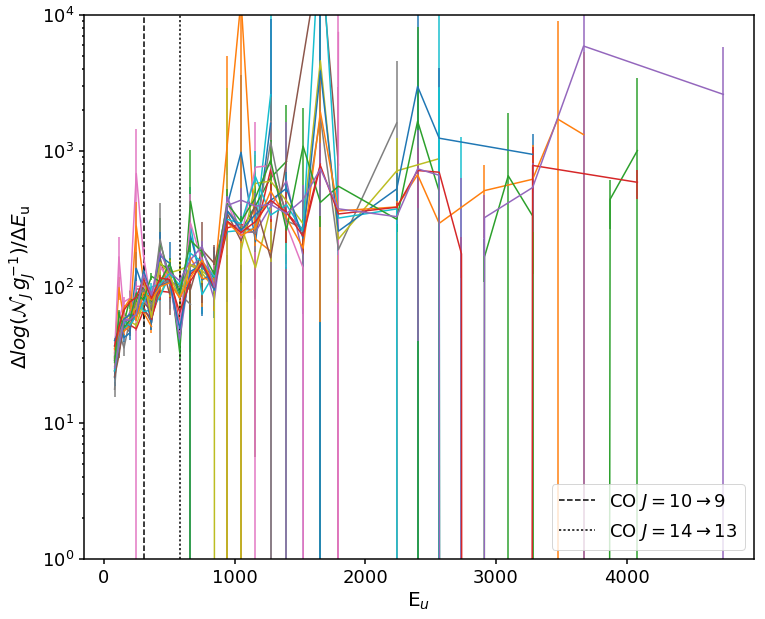

In [20]:
fitting_table = archive_dir+'CDF_archive_v2_lines.txt'

# get the entire object list
from astropy.io import ascii
data = ascii.read(fitting_table)
obj_list = list(set(data['Object'].data))

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# loop through all objects
i = 0
x_dum = []
selector = np.ones_like(np.array(obj_list), dtype='bool')

for io in range(len(obj_list)):
    o = obj_list[io]
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table, opt_correction=16.0,
                                       spire_snr_threshold=5)
        
    try:
        x_dum.append(x[non_mask].max())
    except (ValueError, TypeError):
        selector[io] = False
        continue

sorter = np.argsort(np.array(x_dum))
        
for io in range(len(sorter)):
    
    o = np.array(obj_list)[selector][sorter][io]
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table, opt_correction=16.0,
                                       spire_snr_threshold=5)

    x = x[non_mask]
    y = y[non_mask]
    y_sig = y_sig[non_mask]
    
    # calculate the slopes of each pair of adjacent lines
    try:
        m = (y[1:]-y[:-1])/(x[1:]-x[:-1])
        m_sig = (y_sig[1:]**2+y_sig[:-1]**2)**0.5/(x[1:]-x[:-1])
        # convert into temperatures
        m_t = (-np.log10(np.e))/m.data
        m_sig_t = (np.log10(np.e))*(1/m.data)*(m_sig.data/m.data)
    except TypeError:
        continue
    
    mask = m_sig_t > 1e4
    print(m[mask], m_sig[mask], m_t[mask], m_sig_t[mask])
    ax.errorbar(x[1:], m_t, yerr=m_sig_t)
    i += 1

ax.set_yscale('log')
ax.set_ylim([1,1e4])

# plot possible breaking points
# J=11-10
# j11 = ax.axvline(364.97, linestyle='--', color='k')
# J=10-9
j10 = ax.axvline(304.16, linestyle='--', color='k')
# J=14-13
j14 = ax.axvline(580.49, linestyle=':', color='k')
# J=16-15
# j16 = ax.axvline(751.72, linestyle=':', color='k')
# J=6-5
# j7 = ax.axvline(116.16, linestyle='-', color='Gray', alpha=0.7)

ax.legend([j10, j14],
          [r'CO $J=10\rightarrow9$', r'CO $J=14\rightarrow13$'],
          fontsize=18, loc='best')

# ax.legend(loc='best', ncol=3)
ax.set_xlabel(r'E$_{u}$', fontsize=20)
ax.set_ylabel(r'$\Delta log(\mathcal{N}_{J}\,g_{J}^{-1})/\Delta E_{\rm u}$', fontsize=20)
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

fig.savefig(plotdir+'co_rotdia_slope.pdf', format='pdf', dpi=300, bbox_inches='tight')

BHR71


/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log10
/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in log10
/Users/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in log10


DKCha
RCrA-IRS7C


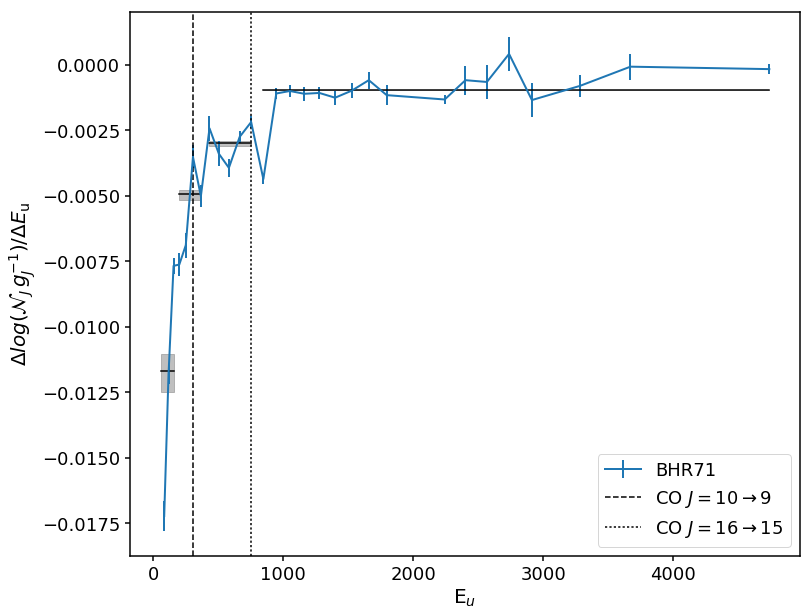

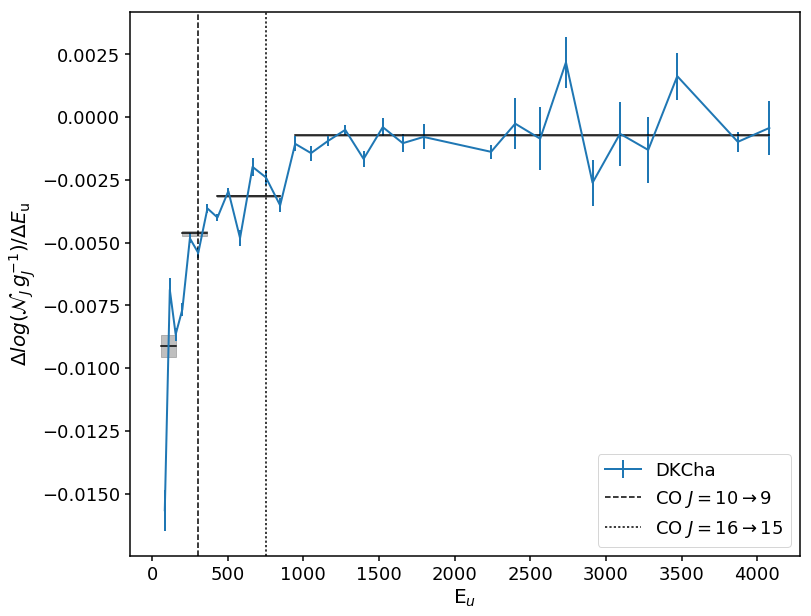

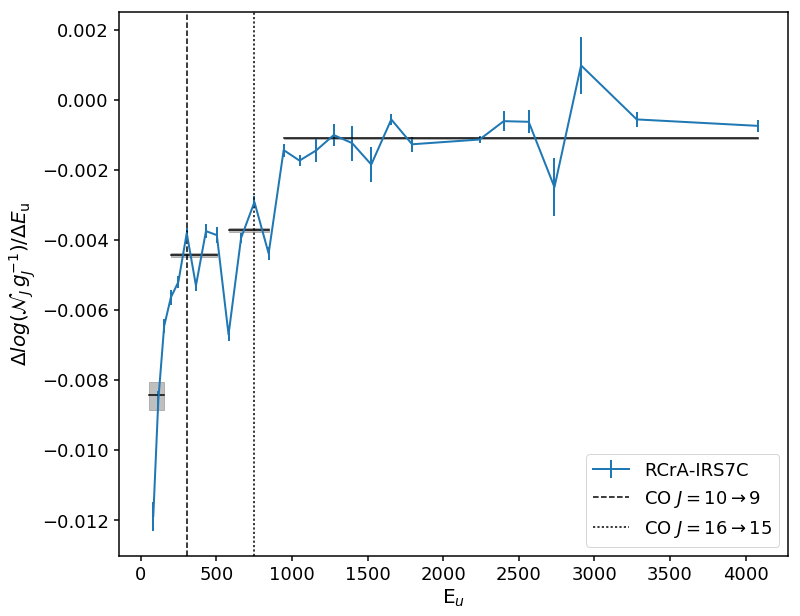

In [23]:
# Just plot a single source

fitting_table = archive_dir+'CDF_archive_v2_lines.txt'

# get the entire object list
from astropy.io import ascii
data = ascii.read(fitting_table)
obj_list = list(set(data['Object'].data))

# dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sorter = np.argsort(np.array(x_dum))[::-1]

# info of fitted T_rot for sources of interest
t_rot = {'Object':['DKCha', 'BHR71', 'RCrA-IRS7C'],
         't_rot': [[599.9, 138.5, 93.7, 47.7],
                   [451.3, 145.1, 87.7, 37.1],
                   [394.9, 117.0, 98.1, 51.5]],
         't_rot_unc': [[12.3, 1.8, 2.0, 2.3],
                       [8.3, 5.0, 3.3, 2.3],
                       [7.2, 1.8, 1.5, 2.5]],
         'data_num': [[18,6,4,4],
                      [17,5,4,4,],
                      [15,4,6,4]]}
for k in t_rot.keys():
    t_rot[k] = np.array(t_rot[k])

i = 0
for io in range(len(sorter)):

    if i >= 3: continue
        
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    
    o = np.array(obj_list)[selector][sorter][io]
    print(o)
    x, y, y_sig, non_mask = pop_dia_1d(o, dist['distance'][dist['object'] == o], fitting_table, opt_correction=16.0)
    
    # calculate the slopes of each pair of adjacent lines
    try:
        x = x[non_mask]
        y = y[non_mask]
        y_sig = y_sig[non_mask]
        m = (y[1:]-y[:-1])/(x[1:]-x[:-1])
        m_sig = (y_sig[1:]**2+y_sig[:-1]**2)**0.5/(x[1:]-x[:-1])
    except TypeError:
        continue

    slope = ax.errorbar(x[1:], m, yerr=m_sig, linewidth=2, label=o)
    color = plt.getp(slope[0], 'color')
    
    data_count = 0
    for it in range(4):
        obj_select = (t_rot['Object'] == o)
        ax.plot(x[-(data_count+t_rot['data_num'][obj_select][0][it]):len(x)-data_count],
                [-np.log10(np.e)/t_rot['t_rot'][obj_select][0][it]]*t_rot['data_num'][obj_select][0][it],
                color='k', linestyle='-')
        ax.fill_between(x[-(data_count+t_rot['data_num'][obj_select][0][it]):len(x)-data_count],
                [-np.log10(np.e)/(t_rot['t_rot'][obj_select][0][it]+t_rot['t_rot_unc'][obj_select][0][it])]*\
                        t_rot['data_num'][obj_select][0][it],
                [-np.log10(np.e)/(t_rot['t_rot'][obj_select][0][it]-t_rot['t_rot_unc'][obj_select][0][it])]*\
                        t_rot['data_num'][obj_select][0][it],
                color='Gray', alpha=0.5)
        data_count = data_count + t_rot['data_num'][obj_select][0][it]
    i += 1


    # plot possible breaking points
    # J=11-10
    # j11 = ax.axvline(364.97, linestyle='--', color='k')
    # J=10-9
    j10 = ax.axvline(304.16, linestyle='--', color='k')
    # J=14-13
    # j14 = ax.axvline(580.49, linestyle=':', color='k')
    # J=16-15
    j16 = ax.axvline(751.72, linestyle=':', color='k')
    # J=6-5
#     j7 = ax.axvline(116.16, linestyle='-', color='Gray', alpha=0.7)

    ax.legend([slope, j10, j16],
              [o, r'CO $J=10\rightarrow9$', r'CO $J=16\rightarrow15$'],
              fontsize=18, loc='best')

    # ax.legend(loc='best', ncol=3)
    ax.set_xlabel(r'E$_{u}$', fontsize=20)
    ax.set_ylabel(r'$\Delta log(\mathcal{N}_{J}\,g_{J}^{-1})/\Delta E_{\rm u}$', fontsize=20)
    ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
    ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    
    fig.savefig(plotdir+'co_rotdia_slope_'+o+'.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Use T$_{\rm rot}$ of 13CO to solve for optical depth of 12CO and T$_{\rm rot}$ iteratively

In [151]:
# rotational diagram function
# no optical correction version
def pop_dia_1d(objname,plotdir,dstar,line_data, species_info,
               fitting=True, plot=False, verbose=True):
    """
    line_data: selected line fitting results with typical header as the fitting table
    species_info: A dictionary contains the neccessary info for constructin rotational diagram
                  This script currently only deals with linear molecules such as CO.
                  Thus, only the rotational constant, B, is accepted.  However, more information
                  provided won't have any negative effect.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    from leastsqfit import lin_leastsqfit
    import astropy.table as astal
    import astropy.constants as const
    import pprint

    from astropy.io import ascii

    # functions for further extract useful information for rotational diagram analysis
    def rot_lin_leastsqfit(x, y, y_sig):
        [yfit ,yerr ,a_hat, cov_hat, s_min] = lin_leastsqfit(x, y, y_sig)

        t_rot = -1/a_hat[1]*np.log10(np.e)
        sig_t_rot = -t_rot*cov_hat[1,1]**0.5/a_hat[1]*np.log10(np.e)
        yoff = a_hat[0]
        sig_yoff = cov_hat[0,0]**0.5

        return yfit ,yerr ,t_rot ,sig_t_rot ,s_min ,yoff, sig_yoff

    home = os.path.expanduser('~')

    # Constants Setup
    c = const.c.cgs.value
    h = const.h.cgs.value
    k = const.k_B.cgs.value
    pc = const.pc.cgs.value

    # species information
    B = species_info['B']
    species_name = species_info['name']

    # Calculate the N/g and Eu from the data
    v = c/(line_data['ObsWL(um)']*1e-4)
    N = 4*np.pi*line_data['Str(W/cm2)']*1e7*(dstar*pc)**2/(line_data['A(s-1)']*h*v)
    N_sigma = 4*np.pi*(1.064*line_data['FWHM(um)']*line_data['Noise(W/cm2/um)'])*1e7*(dstar*pc)**2\
              /(line_data['A(s-1)']*h*v)

    x = line_data['E_u(K)']
    y = np.log10(N/line_data['g'])
    yerr_hi = np.log10((N+N_sigma)/line_data['g'])-np.log10(N/line_data['g'])
    yerr_low = np.log10(N/line_data['g'])-np.log10((N-N_sigma)/line_data['g'])
    y_sig = y*0
    for i in range(0,len(y)):
            y_sig[i] = max(yerr_hi[i], yerr_low[i])
    ind = np.argsort(x)
    x = x[ind]
    y = y[ind]
    y_sig = y_sig[ind]

    if not fitting:
        return x, y, y_sig

    # collect the min-chisq for different kinds of temperature fitting
    s_min_total = []

    # Single temperature fitting
    #
    if len(x) > 2:
        [yfit,yerr,t_rot,sig_t_rot,s_min,yoff,sig_yoff] = rot_lin_leastsqfit(x, y, y_sig)
        Q = float(k*t_rot/h/B)
        N_fit = Q*10**(float(yoff))
        x = x.reshape(len(x))
        y = y.reshape(len(y))
        y_sig = y_sig.reshape(len(y_sig))
        s_min_total.append(s_min)

        if plot:
            fig_rot_dia = plt.figure()
            ax_rot_dia = fig_rot_dia.add_subplot(111)
            data, = ax_rot_dia.plot(x,y,'o',color='DarkGreen',markersize=6)
            ax_rot_dia.errorbar(x,y,yerr=y_sig,linestyle='None',color='DarkGreen')

            fit, = ax_rot_dia.plot(x,yfit,color='DarkMagenta', linewidth=1.5)
            ax_rot_dia.fill_between(x, yfit-yerr, yfit+yerr, facecolor='DarkMagenta', edgecolor='None', alpha=0.5)
            ax_rot_dia.set_xlabel(r'$\rm{E_{u}\,(K)}$',fontsize=18)
            ax_rot_dia.set_ylabel(r'$\rm{log(\mathcal{N}_{J}/g_{J})}$',fontsize=18)
            ax_rot_dia.tick_params('both',labelsize=16,width=1.5,which='major')
            ax_rot_dia.tick_params('both',labelsize=16,width=1.5,which='minor')
            [ax_rot_dia.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
            # ax_rot_dia.set_xlim([0,x.max()+200])
            # ax_rot_dia.set_ylim([42,50])
            ax_rot_dia.legend([fit],
            [r'$\rm{T_{rot}= %5.1f \pm %5.1f\,K,\,\mathcal{N}= %3.2f \times 10^{%d}}$' % (t_rot,sig_t_rot,N_fit/10**np.floor(np.log10(N_fit)),np.floor(np.log10(N_fit)))],\
                numpoints=1,loc='upper right',fontsize=10,framealpha=0.3)
            fig_rot_dia.savefig(plotdir+objname+'_'+species_name+'_rot_single.pdf',format='pdf',dpi=300, bbox_inches='tight')
            ax_rot_dia.cla()
            fig_rot_dia.clf()
        if verbose:
            print('T_rot: %8.6f K' % t_rot)
        s_min_single = s_min
    
    return np.squeeze(np.asarray(t_rot)), np.squeeze(np.asarray(sig_t_rot))

GSS30-IRS1
[  4.98581369   8.05082271  11.64594842  16.50835537]
[ 2.42649496  2.26167641  2.18636716  2.11540398] 0 1.42649496009
[ 1.40052056  1.36188725  1.34371834  1.32626392] 1 0.400520559981
[ 1.34801431  1.31535063  1.2999488   1.2851236 ] 2 0.348014308676
[ 1.3440146   1.31180269  1.29661067  1.28198507] 3 0.344014601997
[ 1.34370275  1.31152605  1.29635038  1.28174034] 4 0.34370275463
[ 1.3436784   1.31150444  1.29633005  1.28172123] 5 0.343678397488
[ 1.34367649  1.31150276  1.29632846  1.28171973] 6 0.343676494786
[ 1.34367635  1.31150263  1.29632834  1.28171962] 7 0.343676346152
[ 1.34367633  1.31150261  1.29632833  1.28171961] 8 0.343676334541
[ 1.34367633  1.31150261  1.29632833  1.28171961] 9 0.343676333634
[ 1.34367633  1.31150261  1.29632833  1.28171961] 10 0.343676333563
Final
[ 1.34367633  1.31150261  1.29632833  1.28171961]
[  6.69931985  10.55867502  15.09697283  21.15908278]
T_rot: 49.309558 K
T_rot: 40.473594 K
RCrA-IRS7B
[  6.41199932   6.51439195   6.78164811 

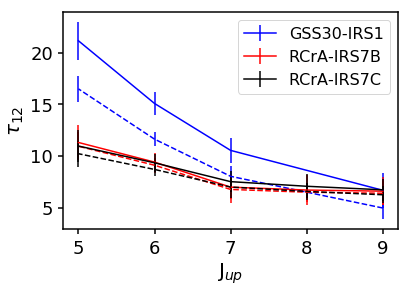

In [170]:
# parameter setup
import numpy as np
import os
import astropy.constants as const
import matplotlib.pyplot as plt
h = const.h.cgs.value
k = const.k_B.cgs.value
c = const.c.cgs.value
home = os.path.expanduser('~')

fitting_table = archive_dir+'CDF_archive_v2_lines.txt'

# get the entire object list
from astropy.io import ascii
data = ascii.read(fitting_table)
obj_list = list(set(data['Object'].data))
# get distance info
# dist = ascii.read('/Users/yaolun/data/cops-spire_distance.txt')
# dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

# 12CO/13CO abundance ratio
R = 70.0

# 13CO
B_13co = 55.1010138e9 # Hz
species_info_13co = {'name': '13CO', 'B': B_13co}

# 12CO
B_12co = 57.63596828e9 # Hz
species_info_12co = {'name': 'CO', 'B': B_12co}

# line data
fitting = ascii.read(fitting_table)

# focus on GSS30-IRS1
obj_list = ['GSS30-IRS1','RCrA-IRS7B','RCrA-IRS7C']
# additional slicer for choosing the same J-lines as 13CO
slicer = (fitting['ObsWL(um)'] >= 280) & (fitting['ObsWL(um)'] <= 600)
# only do J_up = 5,6,7,8,9
J_up = np.arange(5,10)

#iteration setup
max_iter = 10
tol = 0.05

# Planck function in temperature unit
def J_nu(nu, T):
    return h*nu/k*(np.exp(h*nu/k/T)-1)**-1

# plot the difference before and after iterative optical depth correction
fig = plt.figure()
ax = fig.add_subplot(111)
color = ['b','r','k']
lines = []

# loop through all objects
for o in obj_list:
    print(o)

    # select line data
    data_dum = fitting[(fitting['Object'] == o) & (fitting['Pixel_No.'] == 'c') & \
                       (fitting['Validity'] == 1) & (fitting['SNR'] >= 4) & slicer]
    ind12 = []
    ind13 = []
    for i in range(len(data_dum)):
        if len(data_dum['Line'][i].split(species_info_12co['name'])[0]) == 0:
            ind12.append(i)
        if len(data_dum['Line'][i].split(species_info_13co['name'])[0]) == 0:
            ind13.append(i)
    # reject the 12CO indice when the corresponding 13CO line is not found
    ind = 0
    while len(ind13) < len(ind12):
        J_up_dum = int(data_dum['Line'][ind].split(species_info_12co['name'])[1][0])
        if len(data_dum[data_dum['Line'] == '13CO'+str(J_up_dum)+'-'+str(J_up_dum-1)]) == 0:
            ind12.pop(ind)
        else:
            ind += 1
    
    line_data12 = data_dum[ind12]
    line_data13 = data_dum[ind13]
    
    # sort by wavelength
    line_data12 = line_data12[np.argsort(line_data12['ObsWL(um)'])]
    line_data13 = line_data13[np.argsort(line_data13['ObsWL(um)'])]

    # dummy line data
    line_data12_dum = np.copy(line_data12)
    
    tau12 = R*(line_data13['Str(W/cm2)'].data/line_data13['FWHM(um)'].data)/\
              (line_data12['Str(W/cm2)'].data/line_data12['FWHM(um)'].data)
    tau12_unc = tau12*(1/line_data13['SNR'].data**2 + 1/line_data12['SNR'].data**2)**0.5
    
    print(tau12)
    ax.errorbar((line_data12['g']-1)/2, tau12, yerr=tau12_unc,
                color=color[obj_list.index(o)], linestyle='--')
    
    # frequency arrays for 12CO and 13CO
    nu12 = c/line_data12['ObsWL(um)'].data*1e4
    nu13 = c/line_data13['ObsWL(um)'].data*1e4
    
    # iteration starts here
    iter_num = 0
    # initialize Rex with a arbitrary number that won't cause it exits the loop
    Rex = np.array([1+2*tol])
    
    while (abs(Rex.max()-1) >= tol):
        # rotational diagram with fitting
        t_rot12, t_rot12_unc = pop_dia_1d(o, plotdir, dist['distance'][dist['object'] == o],
                                          line_data12_dum, species_info_12co, verbose=False)
        t_rot13, t_rot13_unc = pop_dia_1d(o, plotdir, dist['distance'][dist['object'] == o],
                                          line_data13, species_info_13co, verbose=False)
        
#         print(t_rot12/t_rot13)
        
        # full version of ratio
        Rex = J_nu(nu12, t_rot12)/J_nu(nu13, t_rot13)
        
        print(Rex, iter_num, abs(Rex.max()-1))
        
        # derive tau12
        # the line_data is sorted by wavelength already.  Therefore, the J-order should be the same for 12CO and 13CO
        tau12 = Rex*R*(line_data13['Str(W/cm2)'].data/line_data13['FWHM(um)'].data)/\
                      (line_data12['Str(W/cm2)'].data/line_data12['FWHM(um)'].data)
        tau12_unc = Rex*R*line_data13['Str(W/cm2)'].data/line_data12['Str(W/cm2)'].data*\
                    ((1/line_data13['SNR'].data)**2 +(1/line_data12['SNR'].data)**2)**0.5
            
        # use tau12 to correct for 12CO line flux
        line_data12_dum['Str(W/cm2)'] = line_data12['Str(W/cm2)']*tau12/(1-np.exp(-tau12))
        # How to deal with the uncertainty on the uncertainty?
        line_data12_dum['Noise(W/cm2/um)'] = line_data12['Noise(W/cm2/um)']*tau12/(1-np.exp(-tau12))
        
        if iter_num == max_iter:
            break
        
        iter_num += 1
    
    print('Final')
    print(Rex)
    print(tau12)
    
    line = ax.errorbar((line_data12['g']-1)/2, tau12, yerr=tau12_unc,
                     color=color[obj_list.index(o)], linestyle='-')
    lines.append(line)
    # after the iteration, run the rotational diagram with plotting
    t_rot12, t_rot12_unc = pop_dia_1d(o, plotdir, dist['distance'][dist['object'] == o],
                                      line_data12_dum, species_info_12co, verbose=True, plot=True)
    t_rot13, t_rot13_unc = pop_dia_1d(o, plotdir, dist['distance'][dist['object'] == o],
                                      line_data13, species_info_13co, verbose=True, plot=True)
    
ax.legend(lines, obj_list, fontsize=16, loc='best')

ax.set_xlabel(r'J$_{up}$', fontsize=20)
ax.set_ylabel(r'$\tau_{12}$', fontsize=20)
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

fig.savefig(plotdir+'optical_depth_iterative.pdf', format='pdf', dpi=300, bbox_inches='tight')

## HCN lines analysis

In [121]:
# get the line info from LAMDA
from astropy.io import ascii
import astropy.constants as const
c = const.c.cgs.value

# line_info = ascii.read('/Users/yaolun/data/hcn.txt')
line_info = ascii.read('/home/bettyjo/yaolun/hcn.txt')
line_wave = c/line_info['FREQ(GHz)']/1e9*1e4  # um

In [122]:
for i in range(len(line_info)):
    print(line_info['TRANS'][i], line_wave[i], line_info['A(s^-1)'][i], line_info['E_u/k(K)'][i])

1 3382.45558648 2.407e-05 4.25
2 1691.24776422 0.0002311 12.76
3 1127.52069973 0.0008356 25.52
4 845.663825234 0.002054 42.53
5 676.555027423 0.004102 63.8
6 563.82027595 0.007197 89.32
7 483.299248331 0.01155 119.09
8 422.911810996 0.01739 153.11
9 375.94676843 0.02492 191.38
10 338.377397498 0.03435 233.9
11 307.641247685 0.04591 280.67
12 282.030013435 0.0598 331.68
13 260.361019106 0.07625 386.94
14 241.789501686 0.09546 446.45
15 225.695968049 0.1176 510.2
16 211.615795851 0.143 578.19
17 199.1936867 0.1718 650.42
18 188.153297498 0.2041 726.89
19 178.276462644 0.2403 807.59
20 169.388648377 0.2805 892.53
21 161.348571422 0.3249 981.7
22 154.040624217 0.3738 1075.1
23 147.369320703 0.4273 1172.73
24 141.255075675 0.4857 1274.59
25 135.631044371 0.5491 1380.67


In [123]:
# read in 1D lines
spire_1d = ascii.read(archive_dir+'CDF_archive_v2_spire_1d_lines.txt')
# spire_1d = spire_1d[(spire_1d['Validity'] == 1)]

# select HCN lines
ind_hcn = []
for i in range(len(spire_1d)):
    if len(spire_1d['Line'][i].split('HCN')[0]) == 0:
        ind_hcn.append(i)

hcn_data = spire_1d[ind_hcn]
# add a column for 3-sigma upper limit
hcn_data['upper_limit'] = np.absolute(4*hcn_data['Str(W/cm2)']/hcn_data['SNR'])

## Correlations with evolutionary indicators

In [269]:
# general plotting function for given line luminosity with Lbol/Lsmm
def LineLumLbolLsmm(selectedline, linename, plotname, dist, l_bol_list, lsubmm_list, tbol=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import astropy.constants as const
    
    pc = const.pc.cgs.value
    LS = const.L_sun.cgs.value
    
    x = []
    y = []
    yerr = []

    # create figure object
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # calculate line luminosity
    for o in obj_list:
        total_line = selectedline[selectedline['Object'] == o]
        # erg/s
        line_lum = np.sum(total_line['Str(W/cm2)'])*1e7*4*np.pi*(dist['distance'][dist['object'] == o]*pc)**2/LS
        line_lum_unc = np.sum(total_line['Str(W/cm2)']/total_line['SNR'])*1e7*4*np.pi*(dist['distance'][dist['object'] == o]*pc)**2/LS

        x.append(l_bol_list[obj_list.index(o)]/lsubmm_list[obj_list.index(o)])
        y.append(line_lum)
        yerr.append(line_lum_unc)
        
        if o != 'DKCha':
            ax.errorbar(l_bol_list[obj_list.index(o)]/lsubmm_list[obj_list.index(o)], line_lum, yerr=line_lum_unc,
                        color='b', marker='o', markerfacecolor='None', markeredgewidth=1.5)
#         else:
#             ax.errorbar(l_bol_list[obj_list.index(o)]/lsubmm_list[obj_list.index(o)]-1000, line_lum, yerr=line_lum_unc,
#                         color='r', marker='o', markerfacecolor='None', markeredgewidth=1.5)

#     ax.set_xlim([0,400])
    ax.set_xlabel(r'$L_{bol}/L_{submm}$', fontsize=20)
    # change the label if it detects all Lsubmm is 1.
    if np.mean(np.array(lsubmm_list)) == 1:
        ax.set_xlabel(r'$L_{bol}\,[L_{\odot}]$', fontsize=20)
    if tbol:
        ax.set_xlabel(r'$T_{bol}\,[K]$', fontsize=20)
    ax.set_ylabel(r'$L_{'+linename+'}\,[L_{\odot}$]', fontsize=20)

    ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
    ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

    fig.savefig(plotdir+plotname+'_correlation.pdf', format='pdf', dpi=300, bbox_inches='tight')
    
    return x, y, yerr

A more general use of line luminosity calculation function

In [128]:
# general function for calculating the line luminosity for given line collection and the distance for a given object
def LineLum(selectedline, dist, non_detection=False, spire_snr_threshold=4):
    import numpy as np
    import astropy.constants as const
    
    pc = const.pc.cgs.value
    LS = const.L_sun.cgs.value

    # snr threshold step function
    def snr_step_func(wave, spire_snr_threshold=4):
        snr_array = np.ones_like(wave)
        snr_array[wave <= 195] = snr_array[wave <= 195]*3
        snr_array[wave > 195] = snr_array[wave > 195]*spire_snr_threshold
        
        return snr_array
    
    # calculate line luminosity
    # erg/s
    if not non_detection:
        line_lum = np.sum(selectedline['Str(W/cm2)'])*1e7*4*np.pi*(dist['distance'].data*pc)**2/LS
        line_lum_unc = np.sum(selectedline['Str(W/cm2)']/selectedline['SNR'])*1e7*4*np.pi*(dist['distance'].data*pc)**2/LS
    else:
#         print('Non-detection mode - The SNR threshold is ', snr_threshold)
        line_lum = np.sum(selectedline['Str(W/cm2)']/selectedline['SNR']*\
                   snr_step_func(selectedline['ObsWL(um)'], spire_snr_threshold=spire_snr_threshold))\
                   *1e7*4*np.pi*(dist['distance'].data*pc)**2/LS
        line_lum_unc = np.sum(selectedline['Str(W/cm2)']/selectedline['SNR'])*1e7*4*\
                       np.pi*(dist['distance'].data*pc)**2/LS
    
    return (line_lum, line_lum_unc)

/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide


L1014 [  2.90891612e-05] [ 0.] [ 0.] [ nan]
L1455-IRS3 [ 0.00010893] [ 0.] [ 0.00026236] [ nan]


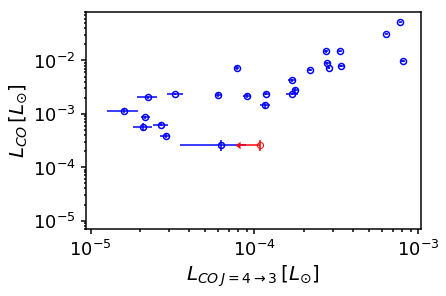

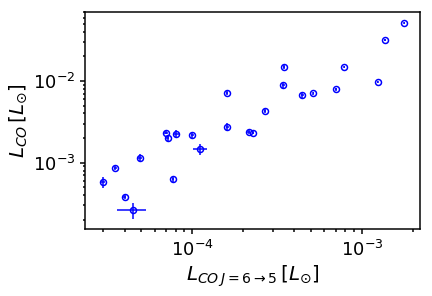

In [131]:
# total CO luminosity vs CO 4-3/CO 6-5 luminosities

from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
fitting = fitting[(fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')]
dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

# indice for all CO lines
ind_co = []
ind_nonco = []
for i in range(len(fitting)):
    if len(fitting['Line'][i].split('CO')[0]) == 0:
        if fitting['ObsWL(um)'][i] <= 195.05:
            if fitting['SNR'][i] >= 3:
                ind_co.append(i)
            else:
                ind_nonco.append(i)
        else:
            if fitting['SNR'][i] >= 4:
                ind_co.append(i)
            else:
                ind_nonco.append(i)


allcoline = fitting[ind_co]
allnoncoline = fitting[ind_nonco]

import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

# dictionaries for storing results
linelum_co_dict = {'luminosity': np.empty_like(obj_list, dtype='float'),
                   'uncertainty': np.empty_like(obj_list, dtype='float'),
                   'ufl': np.zeros_like(obj_list, dtype='float')}
linelum_co43_dict = {'luminosity': np.empty_like(obj_list, dtype='float'),
                     'uncertainty': np.empty_like(obj_list, dtype='float'),
                     'ufl': np.zeros_like(obj_list, dtype='float')}
linelum_co65_dict = {'luminosity': np.empty_like(obj_list, dtype='float'),
                     'uncertainty': np.empty_like(obj_list, dtype='float'),
                     'ufl': np.zeros_like(obj_list, dtype='float')}

for o in obj_list:
    selectedline_co = allcoline[allcoline['Object'] == o]
    selectedline_nonco = allnoncoline[allnoncoline['Object'] == o]
    selectedline_co43 = fitting[(fitting['Object'] == o) & (fitting['Line'] == 'CO4-3')]
    selectedline_co65 = fitting[(fitting['Object'] == o) & (fitting['Line'] == 'CO6-5')]
    
    # for non-detection in CO 4-3 and CO 6-5
    selectedline_nonco43 = fitting[(fitting['Object'] == o) & (fitting['Line'] == 'CO4-3') & (fitting['SNR'] < 4)]
    selectedline_nonco65 = fitting[(fitting['Object'] == o) & (fitting['Line'] == 'CO6-5') & (fitting['SNR'] < 4)]
    
    linelum_co = LineLum(selectedline_co, dist[dist['object'] == o])
    linelum_co43 = LineLum(selectedline_co43, dist[dist['object'] == o])
    linelum_co65 = LineLum(selectedline_co65, dist[dist['object'] == o])

    # Store the calculated line luminosity into lists
    linelum_co_dict['luminosity'][obj_list.index(o)] = float(linelum_co[0])
    linelum_co43_dict['luminosity'][obj_list.index(o)] = float(linelum_co43[0])
    linelum_co65_dict['luminosity'][obj_list.index(o)] = float(linelum_co65[0])
    
    # Store the uncertainty
    linelum_co_dict['uncertainty'][obj_list.index(o)] = float(linelum_co[1])
    linelum_co43_dict['uncertainty'][obj_list.index(o)] = float(linelum_co43[1])
    linelum_co65_dict['uncertainty'][obj_list.index(o)] = float(linelum_co65[1])
    
    # for non-detection on the single line strength
    linelum_nonco = LineLum(selectedline_nonco, dist[dist['object'] == o], non_detection=True,
                            spire_snr_threshold=4)
    linelum_nonco43 = LineLum(selectedline_nonco43, dist[dist['object'] == o], non_detection=True,
                              spire_snr_threshold=4)
    linelum_nonco65 = LineLum(selectedline_nonco65, dist[dist['object'] == o], non_detection=True,
                              spire_snr_threshold=4)
    
    # for non-detection on the total CO luminosity
    linelum_nonco = LineLum(selectedline_nonco, dist[dist['object'] == o], non_detection=True, spire_snr_threshold=4)
    
    # check if non-detection, and then store the upper limit
    # CO 4-3
    if (linelum_co43[0] == 0) & (linelum_nonco43[0] != 0):
        linelum_co43_dict['ufl'][obj_list.index(o)] = -1
        linelum_co43_dict['luminosity'][obj_list.index(o)] = float(linelum_nonco43[0])
        linelum_co43_dict['uncertainty'][obj_list.index(o)] = float(linelum_nonco43[1])
    # CO 6-5
    if (linelum_co65[0] == 0) & (linelum_nonco65[0] != 0):
        linelum_co65_dict['ufl'][obj_list.index(o)] = -1
        linelum_co65_dict['luminosity'][obj_list.index(o)] = float(linelum_nonco65[0])
        linelum_co65_dict['uncertainty'][obj_list.index(o)] = float(linelum_nonco65[1])
    
    # plot
    ax1.errorbar(linelum_co43[0], linelum_co[0], xerr=linelum_co43[1], yerr=linelum_co[1],
                color='b', marker='o', markerfacecolor='None', markeredgewidth=1.5)
    ax2.errorbar(linelum_co65[0], linelum_co[0], xerr=linelum_co65[1], yerr=linelum_co[1],
                color='b', marker='o', markerfacecolor='None', markeredgewidth=1.5)
    
    # non-detection plot
    if (len(selectedline_nonco43) != 0) or (len(selectedline_nonco65) != 0):
        print(o, linelum_nonco43[0], linelum_nonco65[0], linelum_co[0], linelum_nonco[0])
    ax1.errorbar(linelum_nonco43[0], linelum_co[0], xerr=linelum_nonco43[1], yerr=linelum_co[1],
                 xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                 color='r', mec='r')
    ax1.errorbar(linelum_nonco43[0], linelum_nonco[0], xerr=linelum_nonco43[1], yerr=linelum_nonco[1],
                 uplims=True, xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                 color='r', mec='r')
    ax2.errorbar(linelum_nonco65[0], linelum_co[0], xerr=linelum_nonco65[1], yerr=linelum_co[1],
                 xuplims=True, fmt='o', mfc='None', markeredgewidth=1,
                 color='r', mec='r')

# Fig 1 setup
ax1.set_xlabel(r'$L_{CO\,J=4\rightarrow3}\,[L_{\odot}]$', fontsize=20)
ax1.set_ylabel(r'$L_{CO}\,[L_{\odot}$]', fontsize=20)

ax1.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax1.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax1.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

ax1.set_xscale('log')
ax1.set_yscale('log')

fig1.savefig(plotdir+'CO43_CO_correlation.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Fig 2 setup
ax2.set_xlabel(r'$L_{CO\,J=6\rightarrow5}\,[L_{\odot}]$', fontsize=20)
ax2.set_ylabel(r'$L_{CO}\,[L_{\odot}$]', fontsize=20)

ax2.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax2.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax2.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

ax2.set_xscale('log')
ax2.set_yscale('log')

fig2.savefig(plotdir+'CO65_CO_correlation.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [138]:
# write the results into text files for correlation analysis
outdir = '/home/bettyjo/yaolun/test/'
# CO 4-3
foo = open(outdir+'co43.dat', 'w')
for i, (co, co43, co43_ufl) in enumerate(zip(linelum_co_dict['luminosity'],
                                             linelum_co43_dict['luminosity'],
                                             linelum_co43_dict['ufl'])):
    if co == 0:
        continue
    foo.write('{:>4d}{:>10.3e}{:>10.3e} \n'.format(int(co43_ufl), co*1e3, co43*1e4))
foo.close()

# CO 6-5
foo = open(outdir+'co65.dat', 'w')
for i, (co, co65, co65_ufl) in enumerate(zip(linelum_co_dict['luminosity'],
                                             linelum_co65_dict['luminosity'],
                                             linelum_co65_dict['ufl'])):
    if co == 0:
        continue
    foo.write('{:>4d}{:>10.3e}{:>10.3e} \n'.format(int(co65_ufl), co*1e3, co65*1e4))
foo.close()

Fit the relations between L_co and L_co43/L_co65 with a linear function

/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10


Beta: [ 1.27933794  2.55143971]
Beta Std Error: [ 0.12842432  0.46113445]
Beta Covariance: [[ 0.00031796  0.00113434]
 [ 0.00113434  0.00409952]]
Residual Variance: 51.870671547055906
Inverse Condition #: 3.1571652937564984e-05
Reason(s) for Halting:
  Sum of squares convergence
[  1.36407328e-03   1.77769841e-03   1.23670034e-03   2.28379982e-04
   3.44982690e-04   7.73271177e-05   3.47710335e-04   1.60500099e-04
   8.07007840e-05   4.49348534e-05   7.06284674e-04   2.68404692e-04
   1.11640140e-04   7.18834346e-05   2.98238717e-05   4.91738451e-05
   7.02123340e-05   3.99649535e-05   7.88083680e-04   4.46068784e-04
   1.00070481e-04   5.18343157e-04   2.15460597e-04   3.51844271e-05
   1.59565562e-04]
Beta: [ 1.02206854  1.19626069]
Beta Std Error: [ 0.10190406  0.34646243]
Beta Covariance: [[ 0.00013541  0.00045588]
 [ 0.00045588  0.00156523]]
Residual Variance: 76.68907904052827
Inverse Condition #: 4.0995021525533156e-05
Reason(s) for Halting:
  Sum of squares convergence


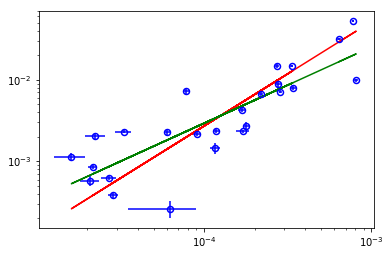

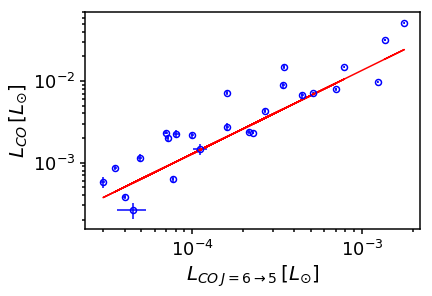

In [145]:
# fit for linear relation
# cannot use the home-made version of fitter, because there are uncertainties on both x and y

from scipy.odr import *
import numpy as np

def f(B, x):
    '''
    fit a linear function in log-log space log10(y) = m*log10(x) + b
    y = 10^(m*log10(x)+b)
    '''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return 10**(B[0]*np.log10(x) + B[1])

log_linear = Model(f)

# CO 4-3
selector = (linelum_co43_dict['ufl']  == 0) & (linelum_co_dict['uncertainty'] != 0)

co43_data = Data(linelum_co43_dict['luminosity'][selector],
                 linelum_co_dict['luminosity'][selector],
                 wd=1./(linelum_co43_dict['uncertainty'][selector])**2,
                 we=1./(linelum_co_dict['uncertainty'][selector])**2)

co43_odr = ODR(co43_data, log_linear, beta0=[1., 1e-3])

out43 = co43_odr.run()
out43.pprint()

fig43 = plt.figure()
ax43 = fig43.add_subplot(111)

ax43.errorbar(linelum_co43_dict['luminosity'][selector],
             linelum_co_dict['luminosity'][selector],
             xerr=linelum_co43_dict['uncertainty'][selector],
             yerr=linelum_co_dict['uncertainty'][selector],
             color='b', marker='o', markerfacecolor='None', markeredgewidth=1.5, linestyle='None')
ax43.set_xscale('log')
ax43.set_yscale('log')
ax43.plot(linelum_co43_dict['luminosity'][selector],
          f(out43.beta, linelum_co43_dict['luminosity'][selector]), 'r')

# calculate the error of the fitting
# odr_fit_err = out43.cov_beta[0,0]*np.log10(linelum_co43_dict['luminosity'][selector])**2+\
#               2*out43.cov_beta[1,0]*np.log10(linelum_co43_dict['luminosity'][selector])+\
#               out43.cov_beta[1,1]

(aa,bb)=np.polyfit(np.log10(linelum_co43_dict['luminosity'][selector]),
                 np.log10(linelum_co_dict['luminosity'][selector]),deg=1)

ax43.plot(linelum_co43_dict['luminosity'][selector],
          f([aa,bb], linelum_co43_dict['luminosity'][selector]), 'g')


# CO 6-5
selector = (linelum_co65_dict['ufl']  == 0) & (linelum_co65_dict['luminosity'] != 0)

print(linelum_co65_dict['luminosity'][selector])

co65_data = Data(linelum_co65_dict['luminosity'][selector],
                 linelum_co_dict['luminosity'][selector],
                 wd=1./(linelum_co65_dict['uncertainty'][selector])**2,
                 we=1./(linelum_co_dict['uncertainty'][selector])**2)

co65_odr = ODR(co65_data, log_linear, beta0=[1., 1e-3])

out65 = co65_odr.run()
out65.pprint()

fig65 = plt.figure()
ax65 = fig65.add_subplot(111)

ax65.errorbar(linelum_co65_dict['luminosity'][selector],
             linelum_co_dict['luminosity'][selector],
             xerr=linelum_co65_dict['uncertainty'][selector],
             yerr=linelum_co_dict['uncertainty'][selector],
             color='b', marker='o', markerfacecolor='None', markeredgewidth=1.5, linestyle='None')
ax65.set_xscale('log')
ax65.set_yscale('log')
ax65.plot(linelum_co65_dict['luminosity'][selector],
          f(out65.beta, linelum_co65_dict['luminosity'][selector]), 'r')

(aa,bb)=np.polyfit(np.log10(linelum_co65_dict['luminosity'][selector]),
                 np.log10(linelum_co_dict['luminosity'][selector]),deg=1)

# ax65.plot(linelum_co65_dict['luminosity'][selector],
#           f([aa,bb], linelum_co65_dict['luminosity'][selector]), 'g')
ax65.set_xlabel(r'$L_{CO\,J=6\rightarrow5}\,[L_{\odot}]$', fontsize=20)
ax65.set_ylabel(r'$L_{CO}\,[L_{\odot}$]', fontsize=20)

ax65.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax65.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=3)
[ax65.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

ax65.set_xscale('log')
ax65.set_yscale('log')

fig65.savefig(plotdir+'CO65_CO_correlation.pdf', format='pdf', dpi=300, bbox_inches='tight')

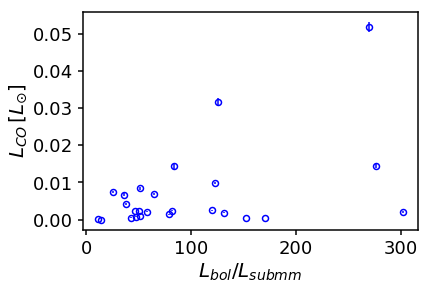

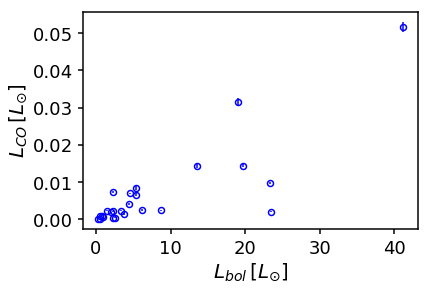

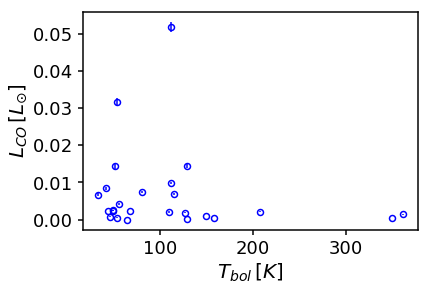

In [160]:
# CO luminosity vs L_bol/L_smm

from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
selector = (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')
dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

# indice for all CO lines
ind_co = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CO')[0]) == 0:
        ind_co.append(i)

allcoline = fitting[selector][ind_co]

# plot
LineLumLbolLsmm(allcoline, 'CO','co_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(allcoline, 'CO','co_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(allcoline, 'CO','co_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

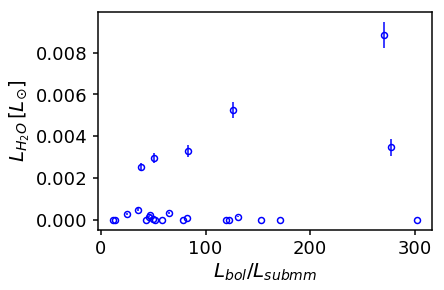

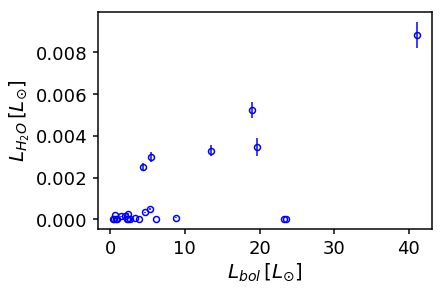

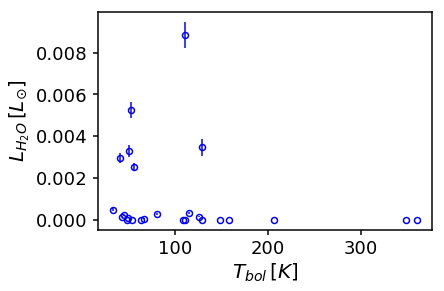

In [161]:
# water luminosity vs L_bol/L_smm
from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
selector = (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')

# indice for all H2O lines
ind_h2o = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('H2O')[0]) == 2:
        ind_h2o.append(i)

allh2oline = fitting[selector][ind_h2o]

LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

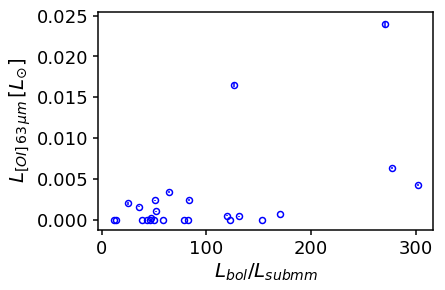

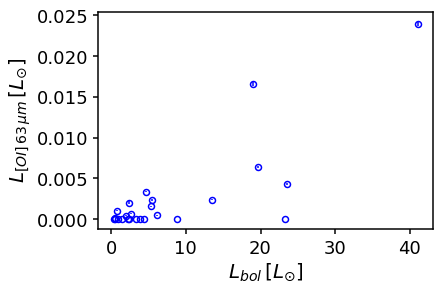

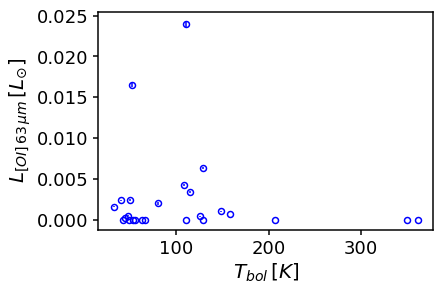

In [162]:
# [OI] line vs L_bol/L_smm
from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
selector = (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')

# indice for [OI] 63 um lines
ind_oi63 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('OI3P1-3P2')[0]) == 0:
        ind_oi63.append(i)

oi63line = fitting[selector][ind_oi63]

LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

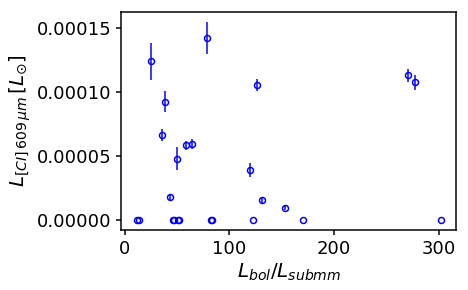

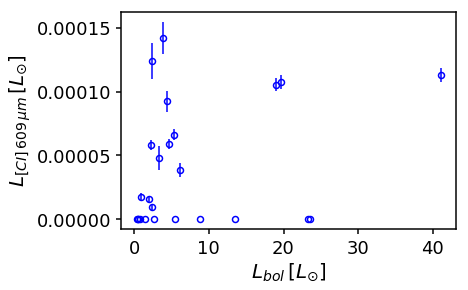

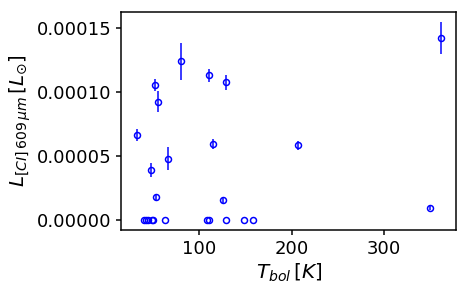

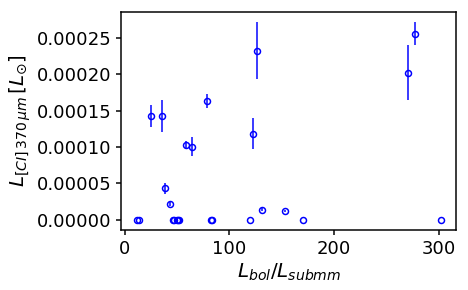

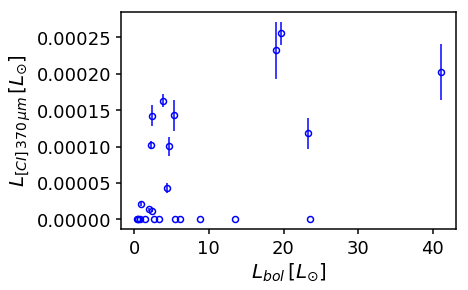

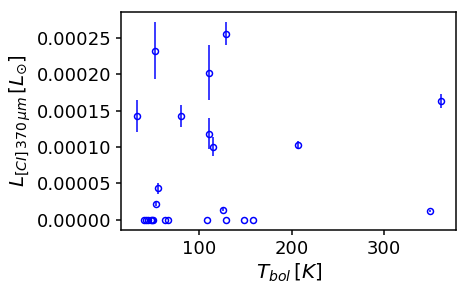

In [163]:
# [CI] line vs L_bol/L_smm
from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
selector = (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')

# indice for [CI] 609 um lines
ind_oi609 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CI3P1-3P0')[0]) == 0:
        ind_oi609.append(i)

oi609line = fitting[selector][ind_oi609]

LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# indice for [CI] 370 um lines
ind_oi370 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CI3P2-3P1')[0]) == 0:
        ind_oi370.append(i)

oi370line = fitting[selector][ind_oi370]

LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

### Correlation strength

In [270]:
from astropy.io import ascii

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
selector = (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & (fitting['Pixel_No.'] == 'c')
dist = ascii.read('/home/bettyjo/yaolun/cops-spire_distance.txt')

# line selection
# indice for all CO lines
ind_co = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CO')[0]) == 0:
        ind_co.append(i)

allcoline = fitting[selector][ind_co]

# indice for all H2O lines
ind_h2o = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('H2O')[0]) == 2:
        ind_h2o.append(i)

allh2oline = fitting[selector][ind_h2o]

# indice for [OI] 63 um lines
ind_oi63 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('OI3P1-3P2')[0]) == 0:
        ind_oi63.append(i)

oi63line = fitting[selector][ind_oi63]

# indice for [CI] 609 um lines
ind_oi609 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CI3P1-3P0')[0]) == 0:
        ind_oi609.append(i)

oi609line = fitting[selector][ind_oi609]

ind_oi370 = []
for i in range(len(fitting[selector])):
    if len(fitting[selector]['Line'][i].split('CI3P2-3P1')[0]) == 0:
        ind_oi370.append(i)

oi370line = fitting[selector][ind_oi370]

Lbol/Lsubmm

In [ ]:
# CO luminosity vs L_bol/L_smm



# plot
LineLumLbolLsmm(allcoline, 'CO','co_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(allcoline, 'CO','co_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(allcoline, 'CO','co_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# water luminosity vs L_bol/L_smm
LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(allh2oline, 'H_{2}O', 'h2o_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# [OI] line vs L_bol/L_smm
LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi63line, '[OI]\,63\,\mu m', 'oi63_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# [CI] line vs L_bol/L_smm
LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi609line, '[CI]\,609\,\mu m', 'ci609_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# indice for [CI] 370 um lines
LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_lbollsmm', dist, l_bol_list, lsubmm_list)
LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_lbolonly', dist, l_bol_list, [1]*len(l_bol_list))
LineLumLbolLsmm(oi370line, '[CI]\,370\,\mu m', 'ci370_tbol', dist, t_bol_list, [1]*len(t_bol_list), tbol=True)

# Line detection limit

In [238]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.constants as const
import numpy as np
c = const.c.cgs.value

print('SPIRE')
for o in obj_list:
    fitting_spire = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_lines.txt')
    if len(fitting_spire['Str(W/cm2)'][(fitting_spire['SNR'] >= 5) & (fitting_spire['Validity'] == 1)]) > 0:
        print((fitting_spire['Str(W/cm2)'][(fitting_spire['SNR'] >= 5) & (fitting_spire['Validity'] == 1)]).min())
print('PACS')
for o in obj_list:
    if o in ['HH46','L723-MM', 'Ced110','IRAS15398','RNO91','L483']: continue
    fitting_pacs = ascii.read(archive_dir+o+'/pacs/advanced_products/'+o+'_pacs_weighted_lines.txt')
    if len(fitting_pacs['Str(W/cm2)'][(fitting_pacs['SNR'] >= 5) & (fitting_pacs['Validity'] == 1)]) > 0:
        print((fitting_pacs['Str(W/cm2)'][(fitting_pacs['SNR'] >= 5) & (fitting_pacs['Validity'] == 1) & (fitting_pacs['Str(W/cm2)'] > 0)]).min())

print('H2O')        
for o in obj_list:
    fitting_spire = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_lines.txt')
    selector = (fitting_spire['SNR'] >= 5) & (fitting_spire['Validity'] == 1)
    
    if len(fitting_spire[selector]) == 0: continue
        
    # get the indice for water line
    ind_h2o = []
    for i in range(len(fitting_spire[selector])):
        if len((fitting_spire['Line'][selector][i]).split('H2O')[0]) == 2:
            ind_h2o.append(i)
    if len(ind_h2o) == 0: continue
    max_str = (fitting_spire['Str(W/cm2)'][selector][ind_h2o]).max()
    print(o, fitting_spire['Line'][selector][ind_h2o][fitting_spire['Str(W/cm2)'][selector][ind_h2o] == max_str].data, max_str)

SPIRE
1.627573e-20
1.619135e-20
1.801856e-21
1.708656e-21
2.197806e-21
2.33668e-21
3.564239e-21
1.991817e-21
9.864994e-21
2.278125e-21
6.38114e-21
2.102231e-21
4.1815e-21
2.17793e-21
3.212219e-21
5.49543e-21
6.275298e-21
1.936402e-21
6.201657e-21
1.133984e-20
4.454032e-21
1.124083e-20
5.951271e-21
2.377817e-21
2.97614e-21
PACS
2.057996e-20
1.322605e-20
1.081567e-20
2.955974e-21
8.555363e-21
4.694583e-21
1.194462e-20
6.522357e-21
4.720406e-21
8.056696e-21
1.139358e-20
5.685989e-21
8.596989e-21
1.175093e-20
7.424816e-21
8.821774e-21
1.077856e-20
4.666035e-21
7.539116e-21
H2O
RCrA-IRS7C ['p-H2O1_11-0_00'] 7.142962e-20
L723-MM ['p-H2O2_02-1_11'] 1.975601e-21
L1157 ['o-H2O3_12-2_21'] 5.097321e-21
BHR71 ['p-H2O1_11-0_00'] 1.615262e-20
B1-a ['o-H2O3_12-2_21'] 6.575975e-21
B1-c ['p-H2O2_02-1_11'] 8.976581e-21
TMR1 ['o-H2O3_12-2_21'] 4.352486e-21
IRAS15398 ['p-H2O1_11-0_00'] 1.478099e-20
GSS30-IRS1 ['o-H2O3_12-2_21'] 2.843495e-20
RCrA-IRS5A ['p-H2O1_11-0_00'] 1.480055e-20
L483 ['p-H2O1_11-0_00'

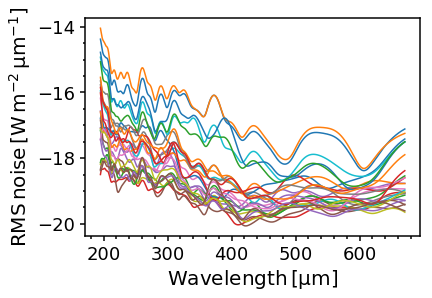

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)

gauss = Gaussian1DKernel(stddev=50)
for o in obj_list:
    noise = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_residual_spectrum.txt')
    # calculate the root sqaure of the noise
    rms = (noise['Flux_Density(Jy)']**2)*0.5 * 1e-26 * c/(noise['Wavelength(um)']*1e-4)**2*1e-4
    rms_cov = convolve(rms, gauss, boundary='extend')
    
    ax.plot(noise['Wavelength(um)'], np.log10(rms_cov), label=o)

ax.set_xlabel(r'$\rm Wavelength\,[\mu m]$', fontsize=20)
ax.set_ylabel(r'$\rm RMS\, noise\,[W\,m^{-2}\,\mu m^{-1}]$', fontsize=20)

ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

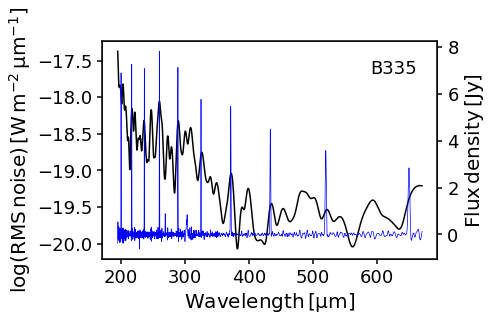

In [227]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

gauss = Gaussian1DKernel(stddev=20)

o = 'B335'

noise = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_residual_spectrum.txt')
# calculate the root sqaure of the noise
rms = (noise['Flux_Density(Jy)']**2)*0.5 * 1e-26 * c/(noise['Wavelength(um)']*1e-4)**2*1e-4
rms_cov = convolve(rms, gauss, boundary='extend')

ax.plot(noise['Wavelength(um)'], np.log10(rms_cov), label=o, color='k')

line_only = ascii.read(archive_dir+o+'/spire/advanced_products/'+o+'_spire_corrected_flat_spectrum.txt')

ax2.plot(line_only['Wavelength(um)'], line_only['Flux_Density(Jy)'], color='b', linewidth=0.7)

    
ax.set_xlabel(r'$\rm Wavelength\,[\mu m]$', fontsize=20)
ax.set_ylabel(r'$\rm log(RMS\, noise)\,[W\,m^{-2}\,\mu m^{-1}]$', fontsize=20)
ax2.set_ylabel(r'$\rm Flux\,density\,[Jy]$', fontsize=20)

ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
ax2.tick_params('both',labelsize=18,width=1.5,which='major',pad=5,length=5)
ax2.tick_params('both',labelsize=18,width=1.5,which='minor',pad=5,length=2.5)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]

ax.text(0.8, 0.85, o, transform=ax.transAxes, fontsize=18)

fig.savefig(plotdir+'fluxlimit.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [229]:
# The mean bolometric luminosity
np.mean(np.array(l_bol_list))

8.9516923076923067

# RMS calculation for o-H2O 1_10-1_01 line

In [239]:
def FluxDensity2Intensity(nu, F_v, beamsize, nunit='Hz', funit='Jy'):
    """
    nu: frequency in Hz
    Convert Intensity (Jy) to brightness temperature (K)
    beamsize: diameter of the beam in arcsec
    """
    import numpy as np
    import astropy.constants as const
    c = const.c.cgs.value
    h = const.h.cgs.value
    k = const.k_B.cgs.value

    # other unit of frequency
    if nunit == 'um':
        nu = c/nu*1e4

    # other unit of flux density -> all covert to Jy
    if funit == 'W/cm2/um':
        F_v = F_v*1e4*c/nu**2*1e7*1e23

    # Flux density (Jy) to cgs (erg/s/cm2/Hz/sr)
    I_v = F_v*1e-23/(np.pi*beamsize**2/4)*4.25e10

    return I_v

def Planck(nu, T):
    import astropy.constants as const
    h = const.h.cgs.value
    k = const.k_B.cgs.value
    c = const.c.cgs.value

    # for given temperature, calculate the corresponding B_v
    B_v = 2*h*nu**3/c**2*(np.exp(h*nu/k/T)-1)**-1

    return B_v

def InversePlanck(nu, Bv):
    import astropy.constants as const
    h = const.h.cgs.value
    k = const.k_B.cgs.value
    c = const.c.cgs.value

    # For given value of B_v, calculate the corresponding temperature
    T = (h*nu/k)*(np.log(2*h*nu**3/c**2/Bv+1))**-1

    return T

In [268]:
from astropy.io import ascii
from scipy.interpolate import interp1d
import numpy as np
import astropy.constants as const
h = const.h.cgs.value
k = const.k_B.cgs.value
c = const.c.cgs.value

fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')

for o in obj_list:
    data = fitting[(fitting['Object'] == o) & (fitting['SNR'] >= 5) & (fitting['Validity'] == 1) & \
                   (fitting['Line'] == 'o-H2O1_10-1_01')]
    if len(data) == 0:
        continue
    I_v = data['Noise(W/cm2/um)'].data*1e7*1e4*(data['ObsWL(um)'].data*1e-4)**2/c  # erg/s/cm2/Hz
    
    print(o, InversePlanck(c/data['ObsWL(um)'].data/1e-4, I_v))

RCrA-IRS7B [ 0.78348974  0.77282293]
RCrA-IRS7C [ 0.77830988  0.77936759  0.76766654]
L1157 [ 0.75701082  0.76405422  0.75507296  0.75971791]
BHR71 [ 0.76621635  0.77089025  0.75710348  0.77774278  0.75685131  0.76072045
  0.76851186  0.97212566]
B1-c [ 0.76655743  0.95616377]


## False-positive rate investigation on SPIRE spectra

Choose the wavelength shift

p-H2O8_53-7_62 251.75737 0.195126834818 0.17469
13CO9-8 302.42221 0.281565849641 0.25047


(0, 2)

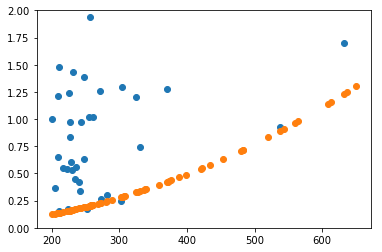

In [10]:
filename = archive_dir+'BHR71/spire/advanced_products/BHR71_spire_corrected_lines.txt'
from astropy.io import ascii
data = ascii.read(filename)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as const
c = const.c.cgs.value
wl_shift = 6.8
dl = 1.5*1.207*(1.2*1e9*(data['LabWL(um)']*1e-4)**2/c)/2.354 * 1e4

nearest_line = np.empty_like(data['LabWL(um)'])

for i, wl in enumerate(data['LabWL(um)']):
    nearest_line[i] = np.sort(abs(wl+wl_shift-data['LabWL(um)']))[0]
    if dl[i] >= nearest_line[i]:
        print(data['Line'][i], wl, dl[i], nearest_line[i])
plt.plot(data['LabWL(um)'], nearest_line, 'o')
plt.plot(data['LabWL(um)'], dl,'o')
plt.ylim([0,2])

In [11]:
archive_dir_fptest = '/home/bettyjo/yaolun/CDF_archive_v2_FPtest/'

fitting_fp = ascii.read(archive_dir_fptest+'CDF_archive_v2_FPtest_lines.txt')
fitting = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')

line_exclusion = (fitting_fp['Line'] != 'p-H2O8_53-7_62') & (fitting_fp['Line'] != '13CO9-8')

In [12]:
fp_line = fitting_fp[(fitting_fp['SNR'] >= 4) & (fitting_fp['Validity'] == 1) & line_exclusion]
fitting_line = fitting[(fitting['SNR'] >= 3) & (fitting['Validity'] == 1) & (fitting['ObsWL(um)'] >= 195.05)]

If SNR threshold = 3, 730 lines are found significant over 54216 lines fitted, yielding a false-positive rate of 1.3%.

If SNR threshold = 4, 530 lines are found significant over 54216 lines fitted, yielding a false-positive rate of 0.98%.

If SNR threshold = 5, 455 lines are found significant over 54216 lines fitted, yielding a false-positive rate of 0.84%.

In [13]:
len(fp_line), len(fitting_line)

(530, 4488)

In [14]:
len(fitting_fp[line_exclusion]), len(fitting[fitting['ObsWL(um)'] >= 195.05])

(54216, 49454)

In [16]:
import scipy as sci
(1-sci.special.erf(3/(2)**0.5))*len(fitting_fp[line_exclusion])*2

292.74428673143075